# Historique actions du CAC40

Nous allons explorer trois secteurs du cac 40 : industrie , luxe et finance

Exploration des Data:

l'API YahooFinance est la source principale de nos données. Pour cela nous importons les deux packages pandas_datareader et yfinance a l'aide de la commande :

● pip install pandas_datareader

● pip install yfinance

L'idée est de se baser sur ces packages pour extraire les données financières associées au CAC40

In [5]:
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
#On choisi 3 groupes dans la catégorie "Industrie"
data = yf.Ticker("^FCHI")
#CAC40 histo
end = datetime.now()
start = datetime(end.year - 4, end.month, end.day)

data_CAC40 = data.history(period="4y")
data_CAC40.tail()

Open         High          Low        Close  \
Date                                                                            
2023-02-21 00:00:00+01:00  7319.930176  7342.680176  7241.209961  7308.649902   
2023-02-22 00:00:00+01:00  7282.490234  7307.819824  7231.629883  7299.259766   
2023-02-23 00:00:00+01:00  7309.029785  7357.680176  7301.419922  7317.430176   
2023-02-24 00:00:00+01:00  7359.759766  7366.069824  7187.270020  7187.270020   
2023-02-27 00:00:00+01:00  7243.029785  7324.029785  7243.029785  7295.549805   

                             Volume  Dividends  Stock Splits  
Date                                                          
2023-02-21 00:00:00+01:00  68754800        0.0           0.0  
2023-02-22 00:00:00+01:00  83809200        0.0           0.0  
2023-02-23 00:00:00+01:00  79939200        0.0           0.0  
2023-02-24 00:00:00+01:00  94517800        0.0           0.0  
2023-02-27 00:00:00+01:00         0        0.0           0.0

Le package pandas_datareader permet de récupérer moyenannt les paramètres de data l'historique des KPI financiers suivants:

● Date : date de la cotation 

● High : le prix le plus haut atteint de la période

● Low : le prix le plus bas de la période

● Open : le prix de cotation au début de la période

● Close : le prix de cotation a la fermeture de la période

● Volume : Le nombre de titres échangés de la période


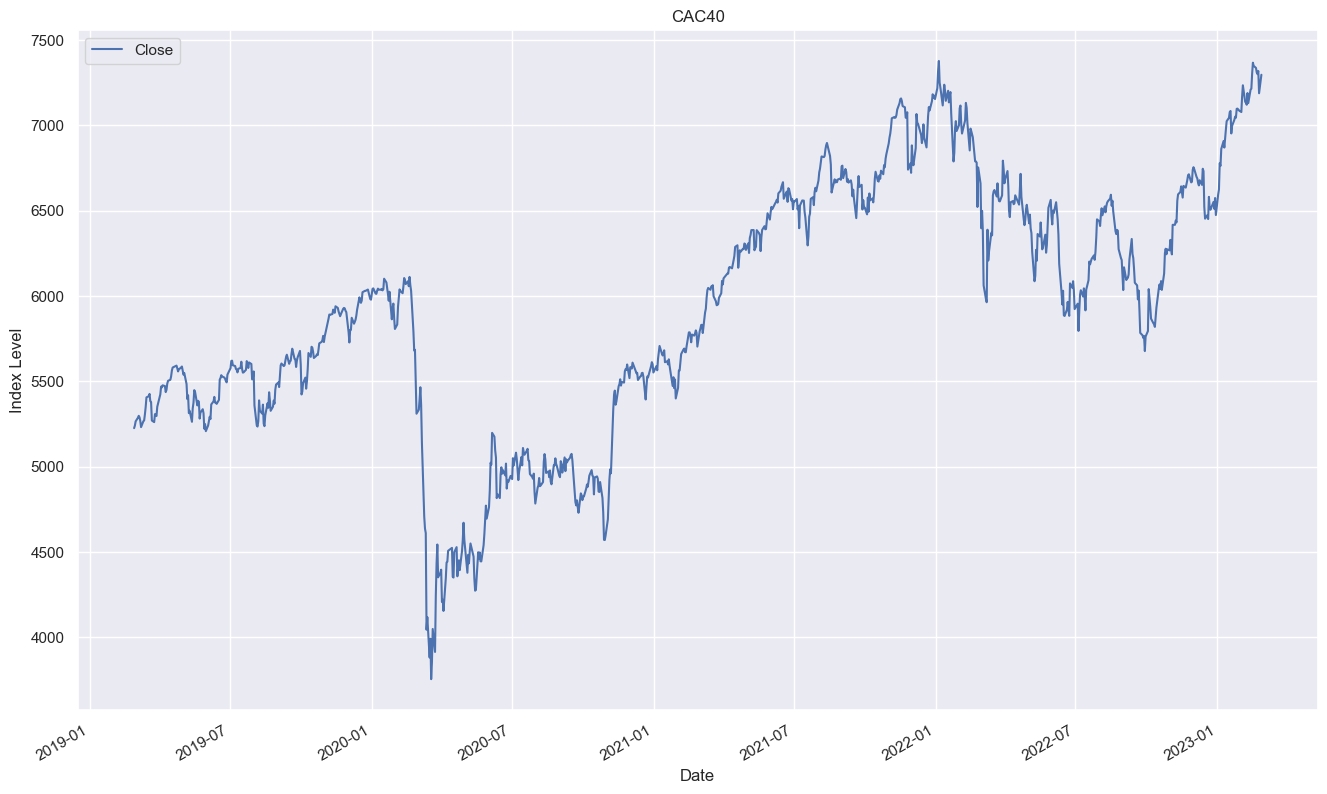

In [6]:
#init
sns.set_theme()
#plot du niveau d'indice
data_CAC40.plot (y = ['Close'], figsize =  (16,10))
plt.title ('CAC40')   
plt.ylabel ('Index Level')
plt.legend()
plt.show();

Le graphique ci dessus retrace l'évolution de l'indice de la place de Paris entre 2018 et fin 2022, On remarque une chute bien visible sur le premier trimestre 2020 ça correspond exactement à l'impact de la pandémie du COVID19 ( couvre feu,recul de l'économie,...) . 

Il s'ensuit une tendance haussière à partir du deuxième trimestre, notamment avec la production des vaccins et la fin des couvre feu ce qui a permis une reprise économique prononcée.


Observation des actions du secteur financier :

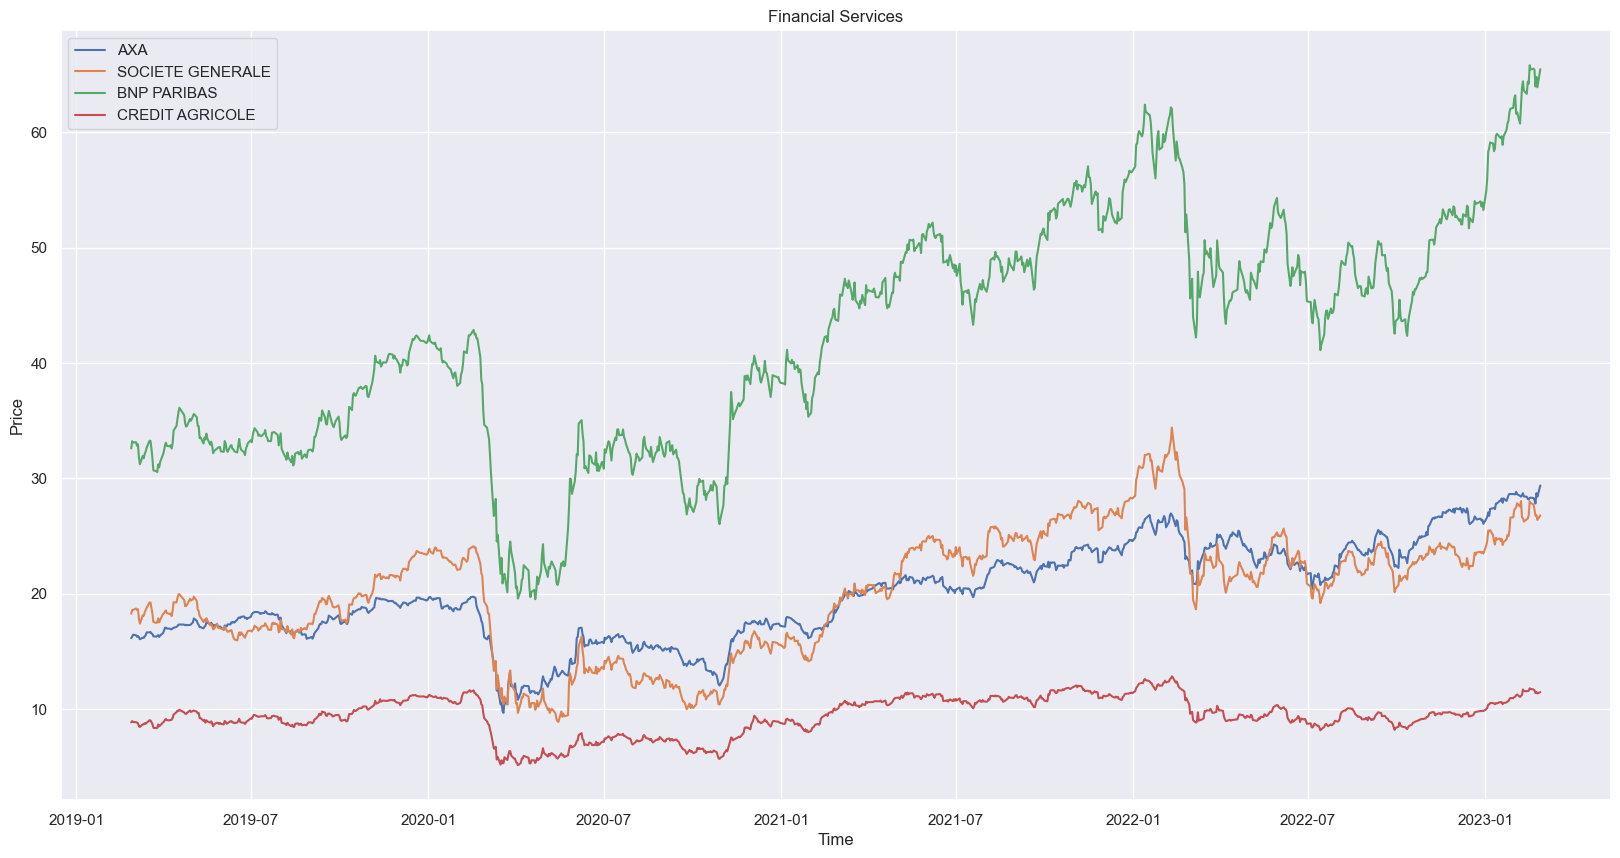

In [7]:
sns.set_theme()
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

ticker = ['CS.PA',
'GLE.PA',
'BNP.PA',
'ACA.PA']

Consumer = ['AXA','SOCIETE GENERALE',
'BNP PARIBAS','CREDIT AGRICOLE'
]
d = {}

plt.figure ( figsize = (20,10)  )   #taille de la figure

#get data from yahoo avec les tickers YahooFinance
for company , ticket in zip(Consumer ,ticker) :
    try:
        y_data = yf.Ticker(ticket)
        d[company]=y_data.history(period="4y")
    except:
        continue
    plt.plot( d [company].index, d [company]['Close'], label = company)   #plot


     

#plot
plt.title ('Financial Services')   
plt.xlabel ('Time')    
plt.ylabel ('Price')
plt.legend(loc='upper left')
plt.show();
    

 


Observations du secteur finance:

Les Equities du secteur financier ont des tendances stables mais subissent fortement la crise du covid 19 en 2020, aussi on peut remarquer visuelement que la courbe des equities du secteur financier est fortement similaire à celle de l'indice CAC40, ce qui signifie que le secteur financier impacte fortement l'indice et donc contribue directement à la performance de l'indice


In [8]:
d['AXA'].describe() #Statistiques du DataFrame associé à l'action AXA

Open         High          Low        Close        Volume  \
count  1029.000000  1029.000000  1029.000000  1029.000000  1.029000e+03   
mean     20.024602    20.223136    19.827692    20.033830  6.340949e+06   
std       4.184327     4.200568     4.187984     4.192816  3.631589e+06   
min       9.556523    10.040926     9.164976     9.667952  0.000000e+00   
25%      16.972089    17.096215    16.847968    16.988947  4.308229e+06   
50%      19.646975    19.774655    19.538642    19.689362  5.372925e+06   
75%      23.400000    23.655001    23.160000    23.444403  7.141853e+06   
max      28.905001    29.590000    28.600000    29.375000  3.571247e+07   

         Dividends  Stock Splits  
count  1029.000000        1029.0  
mean      0.006288           0.0  
std       0.092255           0.0  
min       0.000000           0.0  
25%       0.000000           0.0  
50%       0.000000           0.0  
75%       0.000000           0.0  
max       1.540000           0.0

In [9]:
d['AXA'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1029 entries, 2019-02-27 00:00:00+01:00 to 2023-02-27 00:00:00+01:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1029 non-null   float64
 1   High          1029 non-null   float64
 2   Low           1029 non-null   float64
 3   Close         1029 non-null   float64
 4   Volume        1029 non-null   int64  
 5   Dividends     1029 non-null   float64
 6   Stock Splits  1029 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 64.3 KB


Afin de différencier les tendances par action, on va afficher l'historique des cours de clôture par action

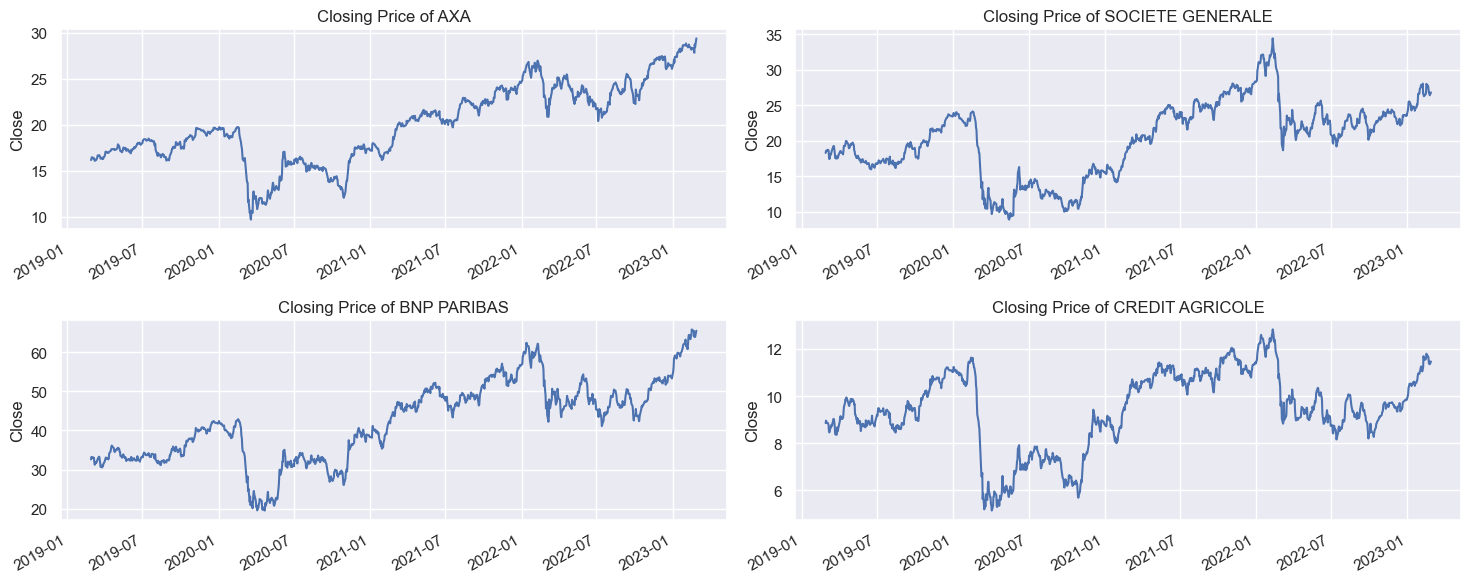

In [10]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(Consumer, 1):
    plt.subplot(2, 2, i)
    d[company]['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {Consumer[i - 1]}")
    
plt.tight_layout()


Le cours de l'action nous donne une idée de l'évolution de l'action unitaire au niveau du marché, le prix d'action dépend aussi du volume tradé courant la période.

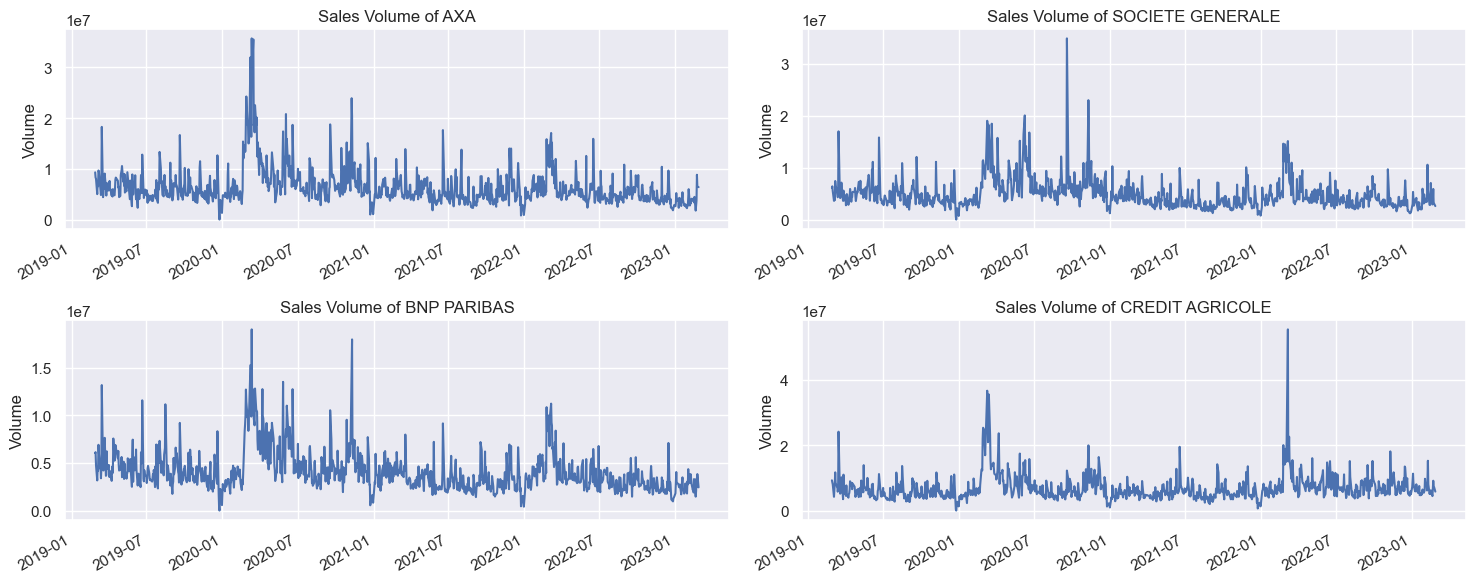

In [11]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(Consumer, 1):
    plt.subplot(2, 2, i)
    d[company]['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume of {Consumer[i - 1]}")
    
plt.tight_layout()

Maintenant que nous avons vu les visualisations du cours de clôture et du volume échangé chaque jour,calculons la moyenne mobile du cours de l'action.



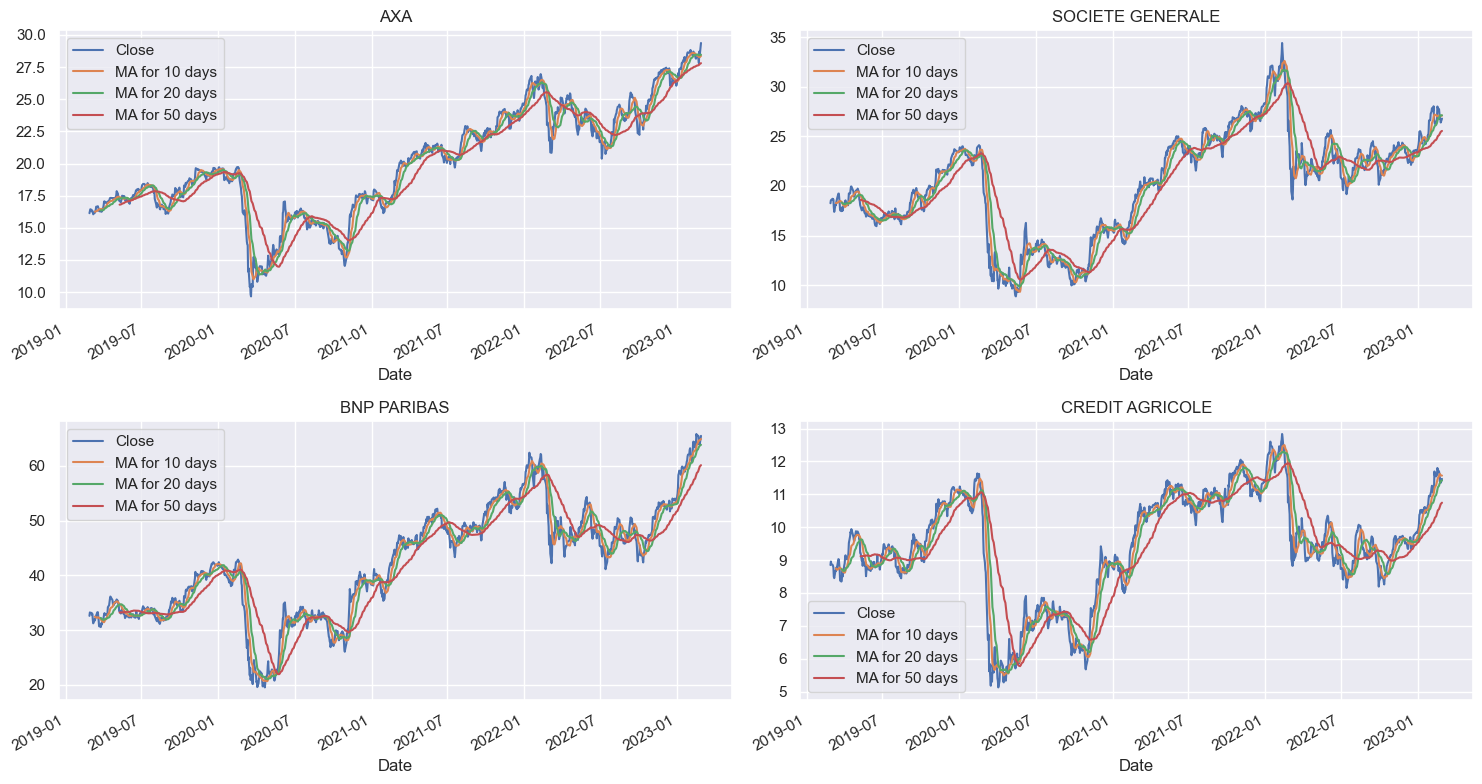

In [12]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in Consumer:
        column_name = f"MA for {ma} days"
        d[company][column_name] = d[company]['Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

d['AXA'][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('AXA')

d['SOCIETE GENERALE'][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('SOCIETE GENERALE')

d['BNP PARIBAS'][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('BNP PARIBAS')

d['CREDIT AGRICOLE'][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('CREDIT AGRICOLE')

fig.tight_layout()


Calculons à présent le Daily Return par action:

Text(0.5, 1.0, 'CREDIT AGRICOLE')

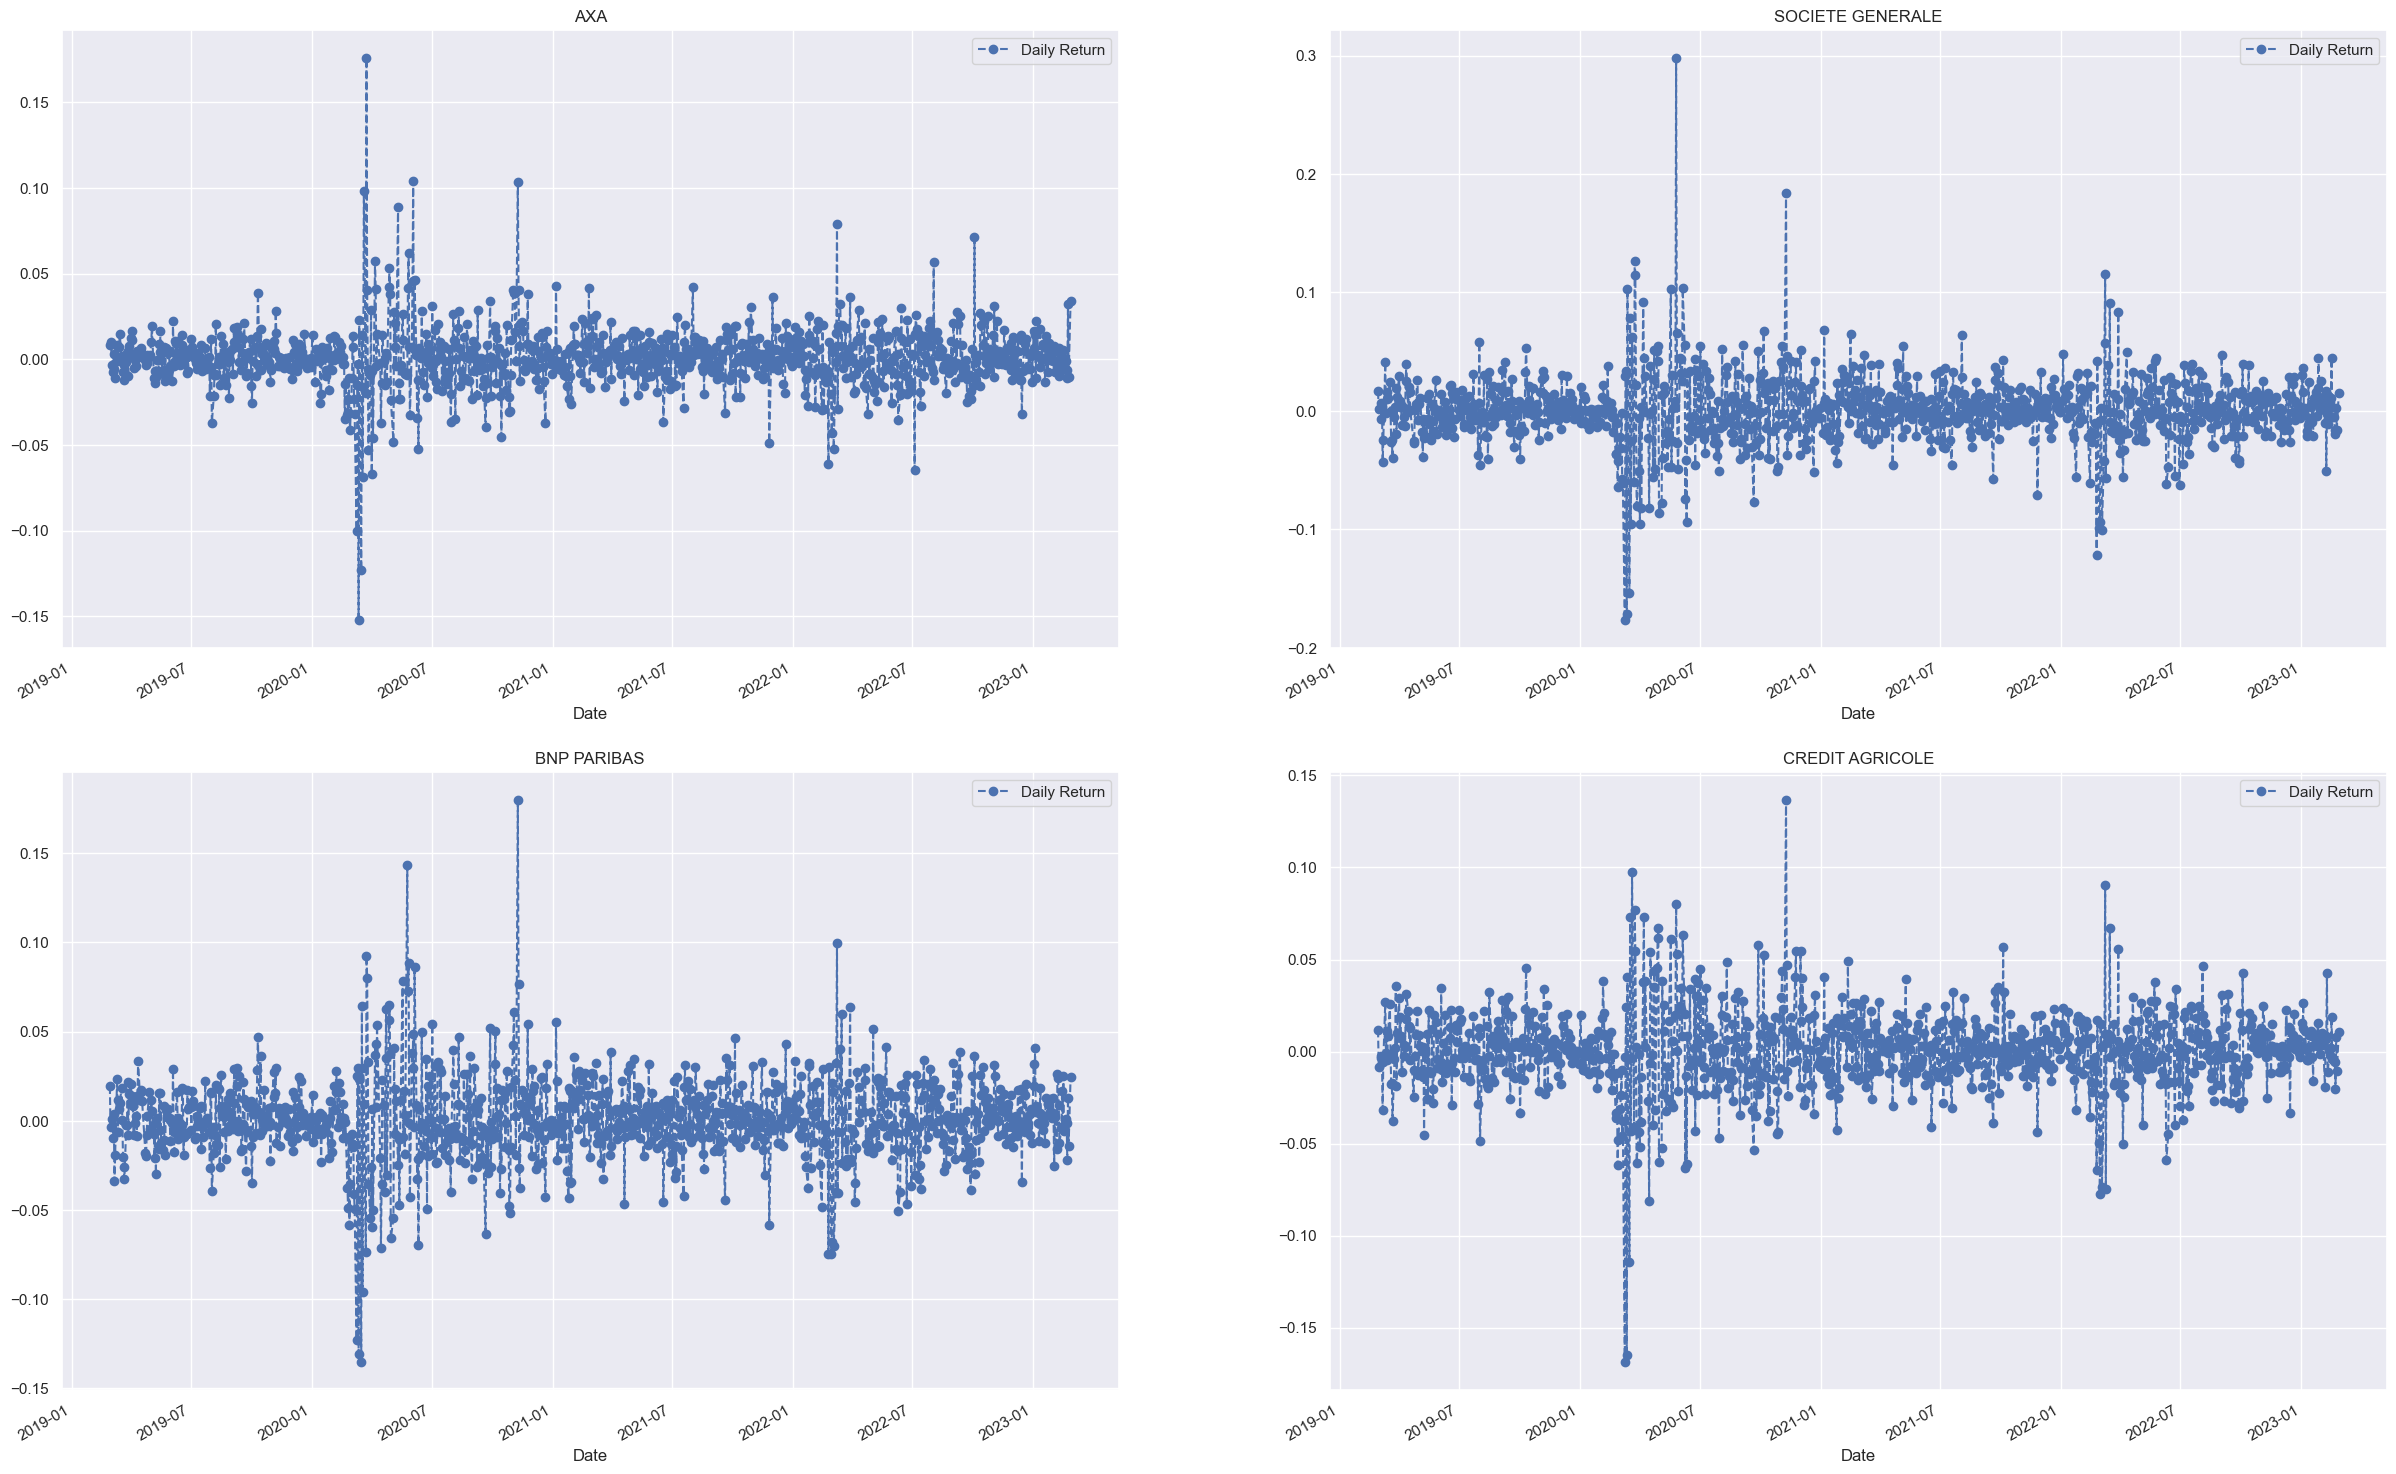

In [13]:
#on va utiliser pct_change pour calculer la variation quotidienne
for company in Consumer:
    d[company]['Daily Return'] = d[company]['Close'].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(30)

d['AXA']['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('AXA')

d['SOCIETE GENERALE']['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('SOCIETE GENERALE')

d['BNP PARIBAS']['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('BNP PARIBAS')

d['CREDIT AGRICOLE']['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('CREDIT AGRICOLE')



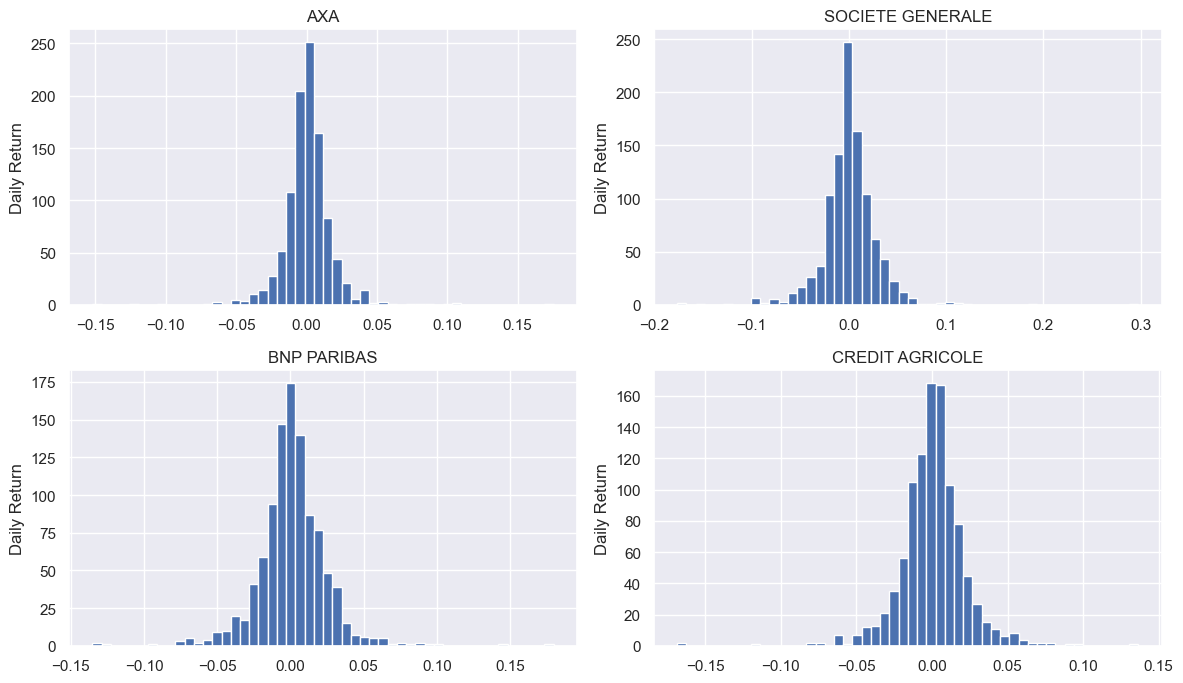

In [14]:
fig.tight_layout()

plt.figure(figsize=(12, 7))

for i, company in enumerate(Consumer, 1):
    plt.subplot(2, 2, i)
    d[company]['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{Consumer[i - 1]}')
    
plt.tight_layout()


In [15]:
Ytickers_df=yf.download(tickers = ticker,  # list of tickers
            period = "4y",         # time period
            interval = "1d",       # trading interval
            ignore_tz = True,      # ignore timezone when aligning data from different exchanges?
            prepost = False)  

[*********************100%***********************]  4 of 4 completed


In [16]:
closing_df=Ytickers_df['Close']
Fin_returns=closing_df.pct_change()
Fin_returns.head()

ACA.PA    BNP.PA     CS.PA    GLE.PA
Date                                              
2019-02-27       NaN       NaN       NaN       NaN
2019-02-28  0.011892  0.019344  0.008595  0.016566
2019-03-01 -0.008369 -0.003551  0.010316  0.001482
2019-03-04 -0.002514  0.001002 -0.003108  0.006472
2019-03-05 -0.003600 -0.009457 -0.007571 -0.006981

Analysons la corrélation entre la sélection d'actions financières du CAC40:

Nous pouvons donc maintenant voir que si deux actions sont parfaitement (et positivement) corrélées entre elles, une relation linéaire entre leurs valeurs de rendement quotidiennes devrait se produire.

Seaborn et pandas permettent de répéter très facilement cette analyse comparative pour chaque combinaison possible d'actions dans notre liste d'equities. Nous utiliserons sns.pairplot()

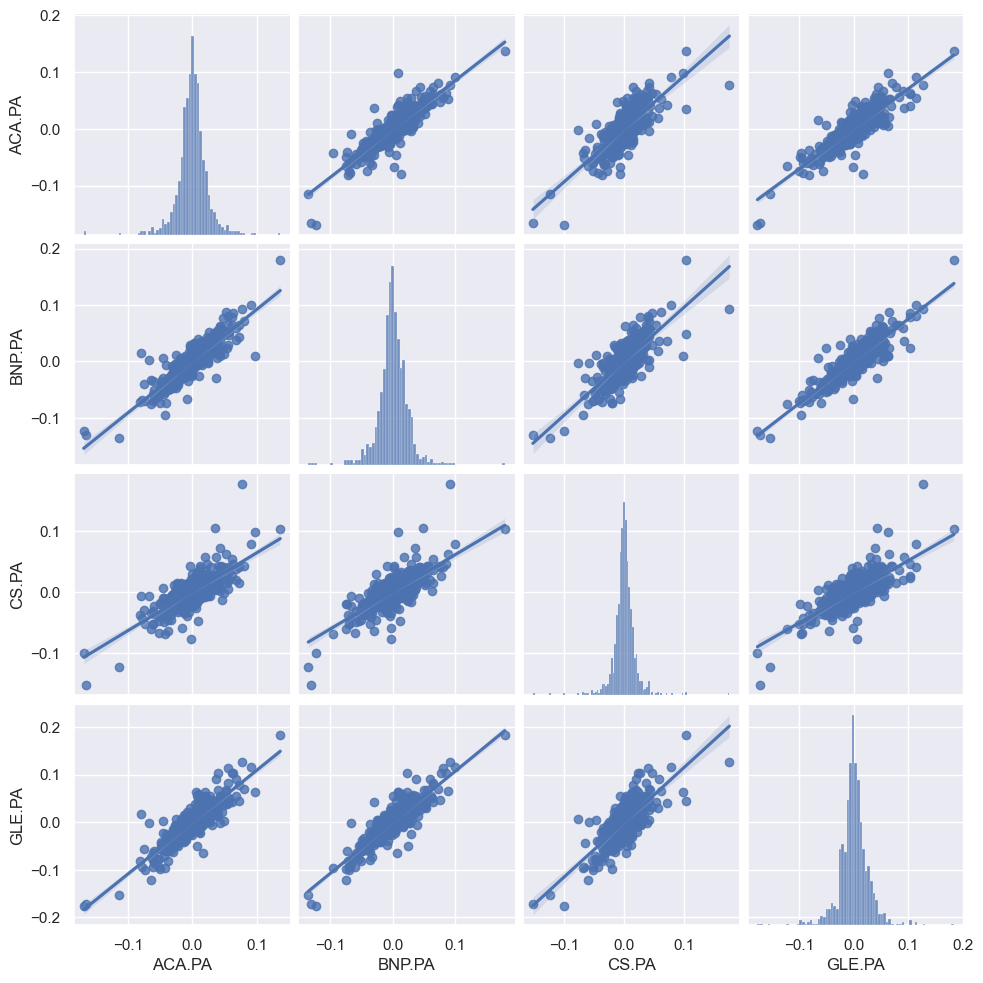

In [17]:
sns.pairplot(Fin_returns,kind='reg')

L'analyse de la corrélation entre notre sélection d'equities peutêtre faites à travers la heatmap sns.heatmap()

<AxesSubplot:>

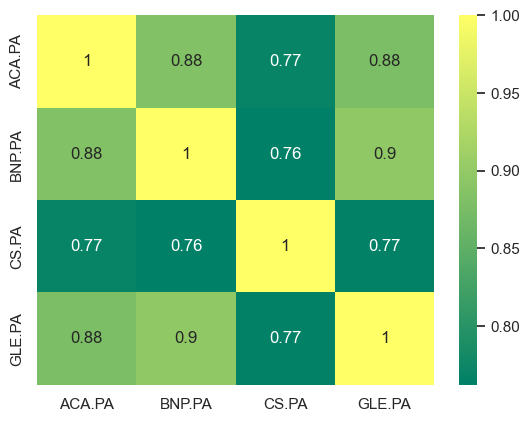

In [18]:
sns.heatmap(Fin_returns.corr(), annot=True, cmap='summer')

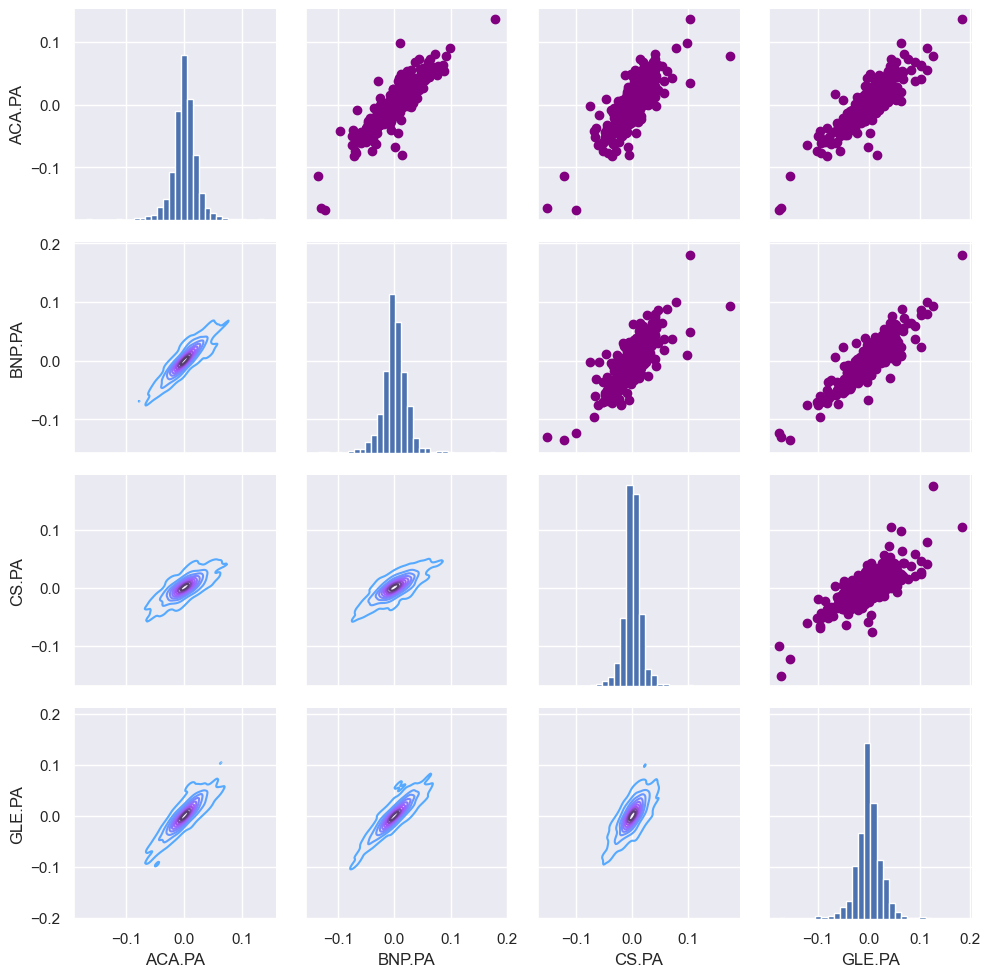

In [19]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(Fin_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

Nous pouvons Quantifier le risk de notre investissement en comparant l'expected return à l'écart type des returns journaliers récupérés

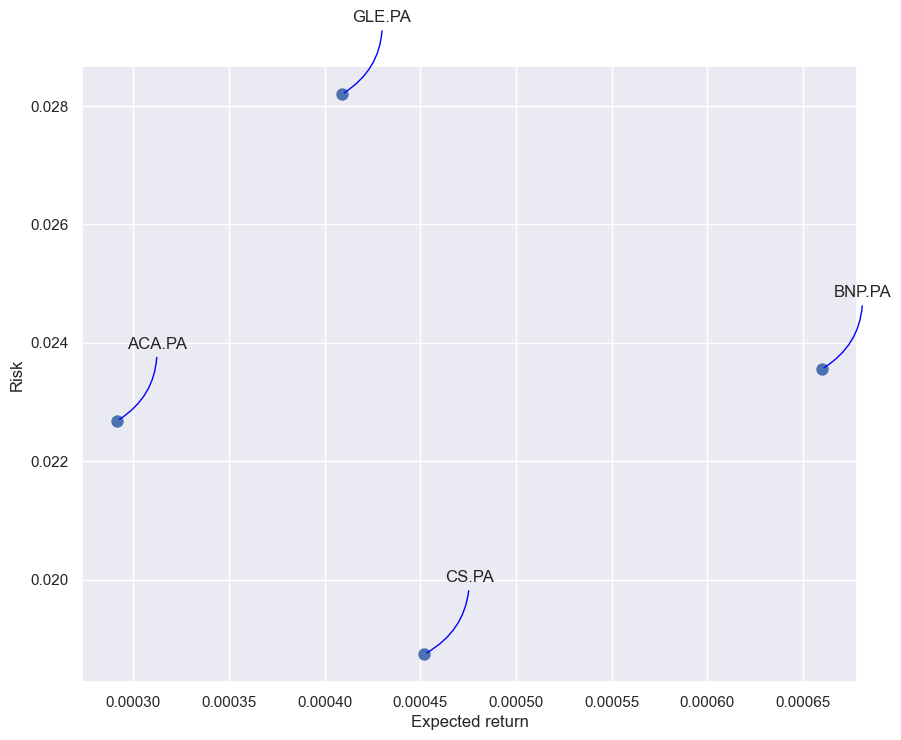

In [20]:
import numpy as np

rets = Fin_returns.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

## **Capital Asset Pricing Model:**
**Analyse des Returns des Assets et le Benchmark (CAC40)**
Outre la prédiction des cours des actions,un autre moyen permet de se positionner par rapport au marché "la rentabilité estimée", le modèle MEDAF permet de quantifier cette rentabilité.
Pour le modèle MEDAF, une analyse YTD est plus pertinente, le dataset se limitera donc sur l'année 2021-2022


 


[*********************100%***********************]  5 of 5 completed


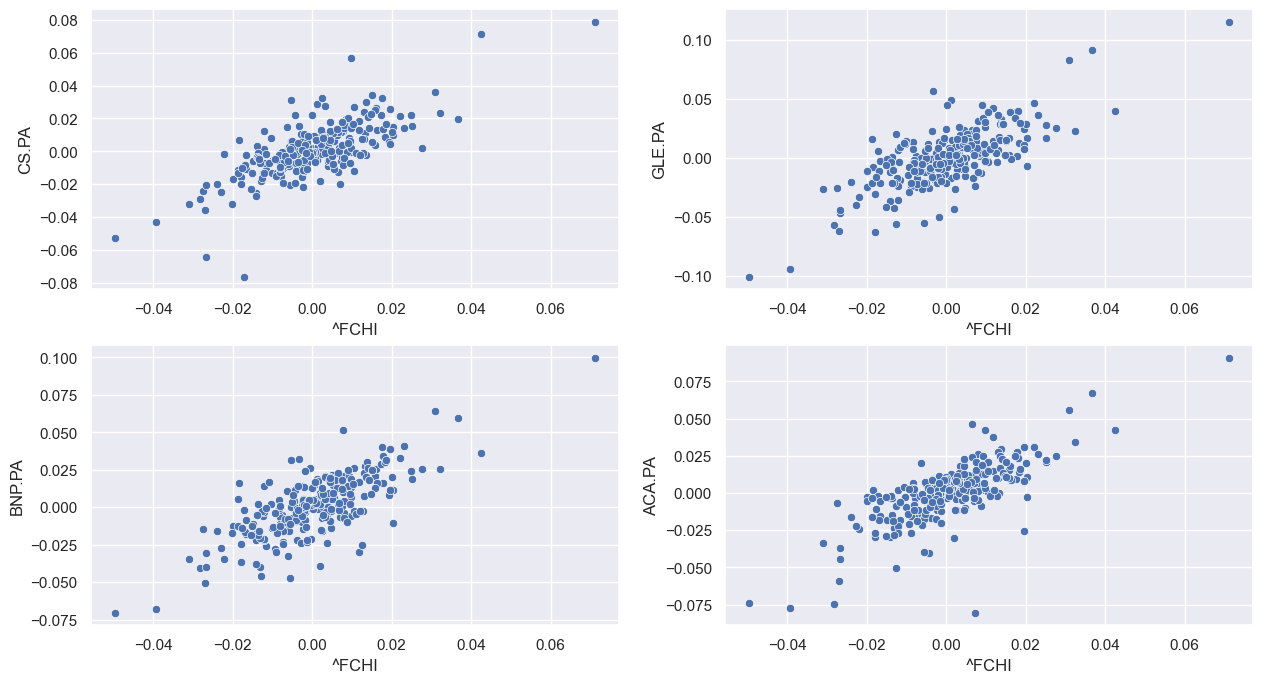

In [21]:
import numpy as np
#Data du CAC40:
end1 = datetime.now()
start1 = datetime(end.year - 1, end.month, end.day)
###############################
ticker_1= ['CS.PA',
'GLE.PA',
'BNP.PA',
'ACA.PA','^FCHI']

Ytickers_CPAM=yf.download(tickers = ticker_1,  # list of tickers
            period = "1y",         # time period
            interval = "1d",       # trading interval
            ignore_tz = True,      # ignore timezone when aligning data from different exchanges?
            prepost = False)  
Fin_returns_1Y = Ytickers_CPAM['Close'].pct_change()
Fin_returns_1Y = Fin_returns_1Y.fillna(0)
Fin_returns_1Y.head()
Plot_t = ['CS.PA',
'GLE.PA',
'BNP.PA',
'ACA.PA']
# plot a scatter plot between AXA and the CAC40 (Market)
plt.figure(figsize=(15,8))
for i,t in enumerate(Plot_t,1):
  plt.subplot(2, 2, i)
  sns.scatterplot(data=Fin_returns_1Y,y=t,x='^FCHI')



In [22]:
#Calculons à présent le Beta et l'alpha des actions:**
b={}
a={}
for t in Plot_t:
  beta, alpha = np.polyfit(Fin_returns_1Y['^FCHI'],Fin_returns_1Y[t], 1)
  b[t]=beta
  a[t]=alpha
  print('Beta for {} stock is = {} and alpha is = {}'.format(t, round(beta,8), round(alpha,8))) 

Beta for CS.PA stock is = 0.94457644 and alpha is = 0.00046387
Beta for GLE.PA stock is = 1.36221067 and alpha is = -0.00013177
Beta for BNP.PA stock is = 1.16283573 and alpha is = 0.00054905
Beta for ACA.PA stock is = 1.14858791 and alpha is = -0.00030426


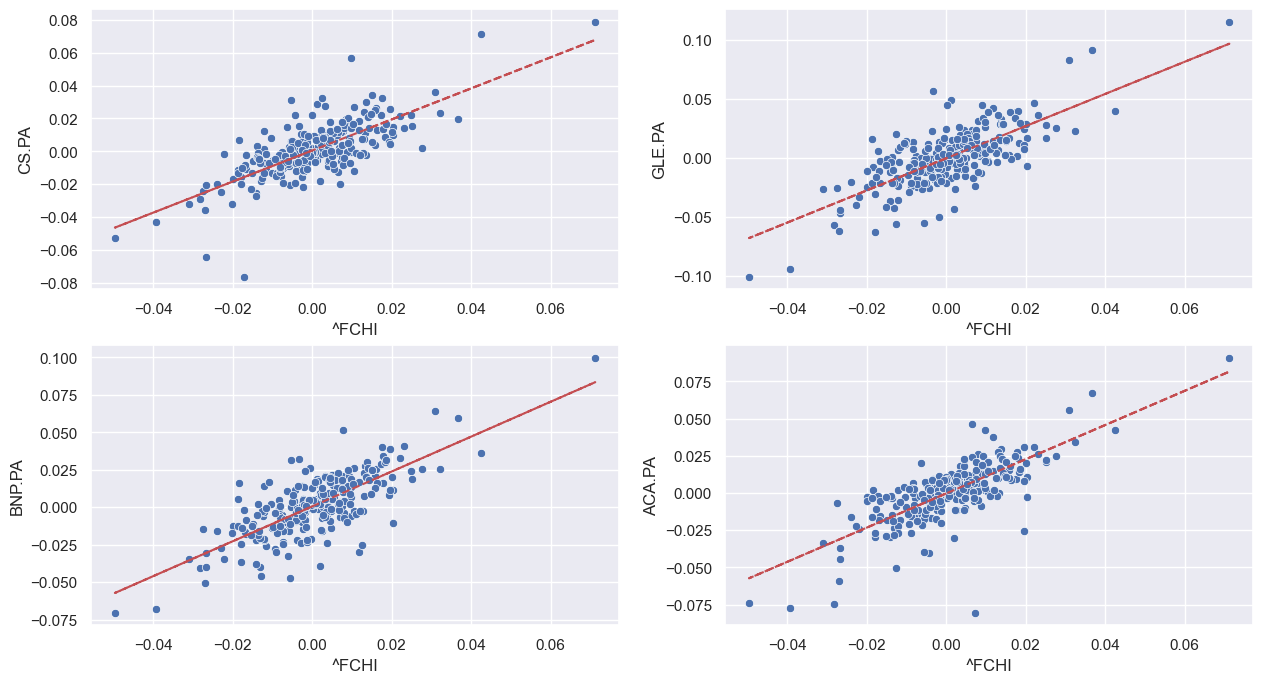

In [23]:
# Now let's plot the scatter plot and the straight line on one plot
plt.figure(figsize=(15,8))
for i,t in enumerate(Plot_t,1):
  plt.subplot(2, 2, i)
  sns.scatterplot(data=Fin_returns_1Y,y=t,x='^FCHI')
  plt.plot(Fin_returns_1Y['^FCHI'], b[t] * Fin_returns_1Y['^FCHI'] + a[t], '--', color = 'r')


# Straight line equation with alpha and beta parameters 
# Straight line equation is y = beta * rm + alpha




In [24]:
Fin_returns_1Y['^FCHI'].mean()*100
#Beta:
print(b) #Beta of each Equity

{'CS.PA': 0.9445764386154751, 'GLE.PA': 1.3622106734019759, 'BNP.PA': 1.1628357325766223, 'ACA.PA': 1.148587908291834}


In [ ]:
#API connection to BANQUE DE Data
import http.client

conn = http.client.HTTPSConnection("api.webstat.banque-france.fr")

headers = { 'accept': "application/json" }

conn.request("GET", "/webstat-en/v1/catalogue?client_id=8905c53d-9d78-4c6f-a7b9-21139bddbc2d&format=json", headers=headers)

res = conn.getresponse()
data = res.read()

data.decode("utf-8")

In [25]:
rm = round(Fin_returns_1Y['^FCHI'].mean()*252.3*100,8)
rm
rf=3.0490 #OAT 10 ans 
for t in Plot_t:
  ER_Equities = round(rf + ( b[t] * (rm-rf) ) ,3) # Calculate return for each equity vs Bench
  print(ER_Equities,"est la rentabilité espérée de l'asset : ",t)

10.67 est la rentabilité espérée de l'asset :  CS.PA
14.04 est la rentabilité espérée de l'asset :  GLE.PA
12.431 est la rentabilité espérée de l'asset :  BNP.PA
12.316 est la rentabilité espérée de l'asset :  ACA.PA


## **Modèle XGBoost:**

Utilisons à présent le modèle XGBoost, afin de prédire les cours de nos actions

In [ ]:
import os
import xgboost as xgb

from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Time series decomposition
!pip install stldecompose
!pip install statsmodels==0.10.2
from stldecompose import decompose


ModuleNotFoundError: No module named 'xgboost'

Decomposition en séries temporelles:

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


data_close.head()


decompose = decompose(data_close, period=365)
fig = decompose.plot()
fig.set_size_inches(20, 8)
for company in Consumer:
        data_close = data[['Close']].copy()
        d[company][column_name] = d[company]['Close'].rolling(ma).mean()


In [ ]:
#Mobile Mean per Equity
ma_day = [10,20, 30]

for ma in ma_day:
    for company in Consumer:
        column_name = f"MA for {ma} days"
        d[company][column_name] = d[company]['Close'].rolling(ma).mean()

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

d['AXA'][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 30 days']].plot(ax=axes[0,0])
axes[0,0].set_title('AXA')

d['SOCIETE GENERALE'][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 30 days']].plot(ax=axes[0,1])
axes[0,1].set_title('SOCIETE GENERALE')

d['BNP PARIBAS'][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 30 days']].plot(ax=axes[1,0])
axes[1,0].set_title('BNP PARIBAS')

d['CREDIT AGRICOLE'][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 30 days']].plot(ax=axes[1,1])
axes[1,1].set_title('CREDIT AGRICOLE')

fig.tight_layout()

In [ ]:
def relative_strength_idx(df, n=14):
    close = data['Close']
    delta = close.diff()
    delta = delta[1:]
    pricesUp = delta.copy()
    pricesDown = delta.copy()
    pricesUp[pricesUp < 0] = 0
    pricesDown[pricesDown > 0] = 0
    rollUp = pricesUp.rolling(n).mean()
    rollDown = pricesDown.abs().rolling(n).mean()
    rs = rollUp / rollDown
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi

df['RSI'] = relative_strength_idx(df).fillna(0)

fig = go.Figure(go.Scatter(x=df.Date, y=df.RSI, name='RSI'))
fig.show()

## **Modèle LSTM:**

Repronons l'exemple de nos 4 actions financières:

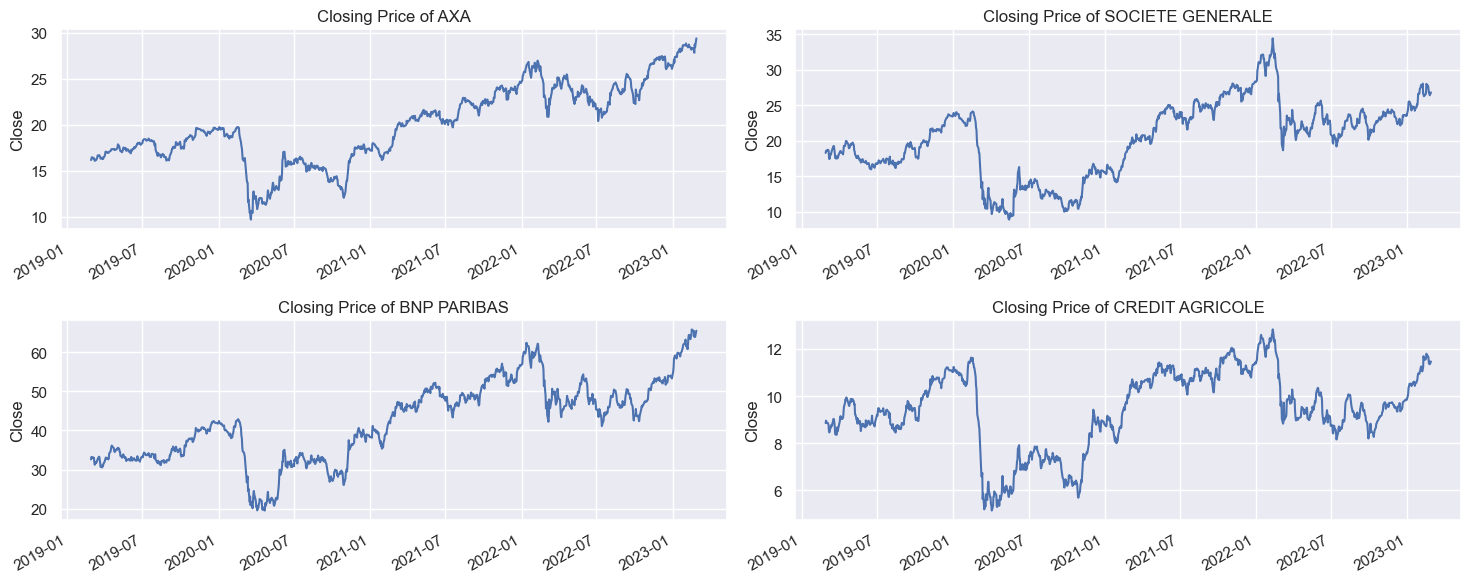

In [26]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(Consumer, 1):
    plt.subplot(2, 2, i)
    d[company]['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {Consumer[i - 1]}")
    
plt.tight_layout()

Focus Exemple AXA:

In [86]:
import numpy as np
d['AXA'].head()
df = d['AXA'].filter(['Close'])
dataset = df.values
training_data_len = int(np.ceil( len(dataset) * .50 )) #60%
dataset_train = df.iloc[0:training_data_len]


In [87]:
len(dataset_train)

515

In [88]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(df)


In [89]:
X_train = []
y_train = []
for i in range(60, len(df)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [90]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense 

In [91]:
model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
31/31 [==============================] - 6s 69ms/step - loss: 0.0607
Epoch 2/100
31/31 [==============================] - 2s 69ms/step - loss: 0.0114
Epoch 3/100
31/31 [==============================] - 4s 120ms/step - loss: 0.0085
Epoch 4/100
31/31 [==============================] - 2s 68ms/step - loss: 0.0078
Epoch 5/100
31/31 [==============================] - 4s 121ms/step - loss: 0.0080
Epoch 6/100
31/31 [==============================] - 2s 61ms/step - loss: 0.0077
Epoch 7/100
31/31 [==============================] - 3s 109ms/step - loss: 0.0080
Epoch 8/100
31/31 [==============================] - 3s 106ms/step - loss: 0.0062
Epoch 9/100
31/31 [==============================] - 2s 69ms/step - loss: 0.0069
Epoch 10/100
31/31 [==============================] - 4s 115ms/step - loss: 0.0062
Epoch 11/100
31/31 [==============================] - 2s 64ms/step - loss: 0.0057
Epoch 12/100
31/31 [==============================] - 3s 96ms/step - loss: 0.0063
Epoch 13/100
31/31 [

In [106]:
stp1=int(training_data_len*1.5)
dataset_test = df.iloc[stp1:len(df)]

In [107]:
real_stock_price = dataset_test.values
inputs = df[len(df) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(dataset_test)+60):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

5/9 [===============>..............] - ETA: 0s

c:\Users\b012gct\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


9/9 [==============================] - 0s 26ms/step


In [108]:
len(predicted_stock_price)


257

C:\Users\b012gct\AppData\Local\Temp\ipykernel_4904\3512842276.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predicted_stock_price


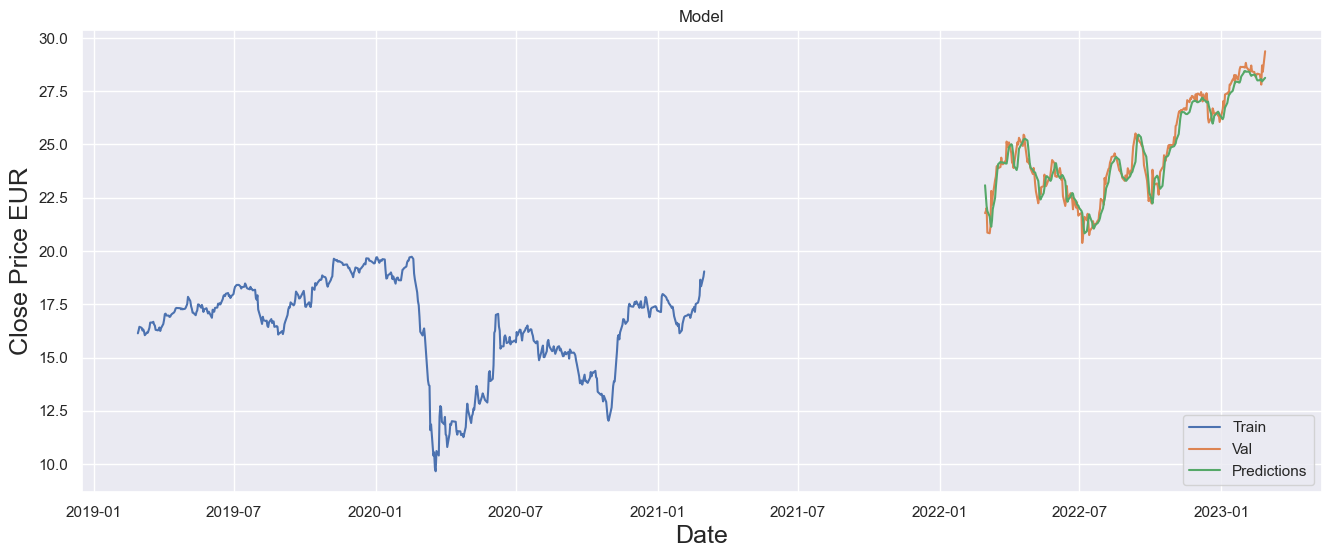

In [109]:
# Plot the data
train = dataset_train
valid = dataset_test
valid['Predictions'] = predicted_stock_price
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price EUR', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

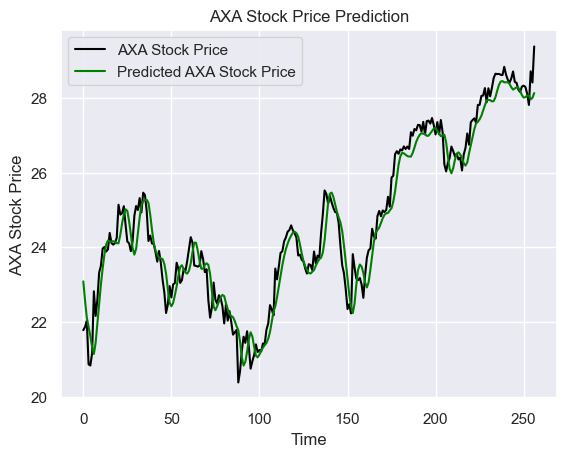

In [110]:
plt.plot(real_stock_price, color = 'black', label = 'AXA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted AXA Stock Price')
plt.title('AXA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AXA Stock Price')
plt.legend()
plt.show()

Observations du secteur industriel :

# Les Equities du secteur industriel ont des tendances stables mais subissent la crise suite à la situation du pays avec la Russie (Gaz, Titane etc..).

# Observation des actions du secteur de l'industrie

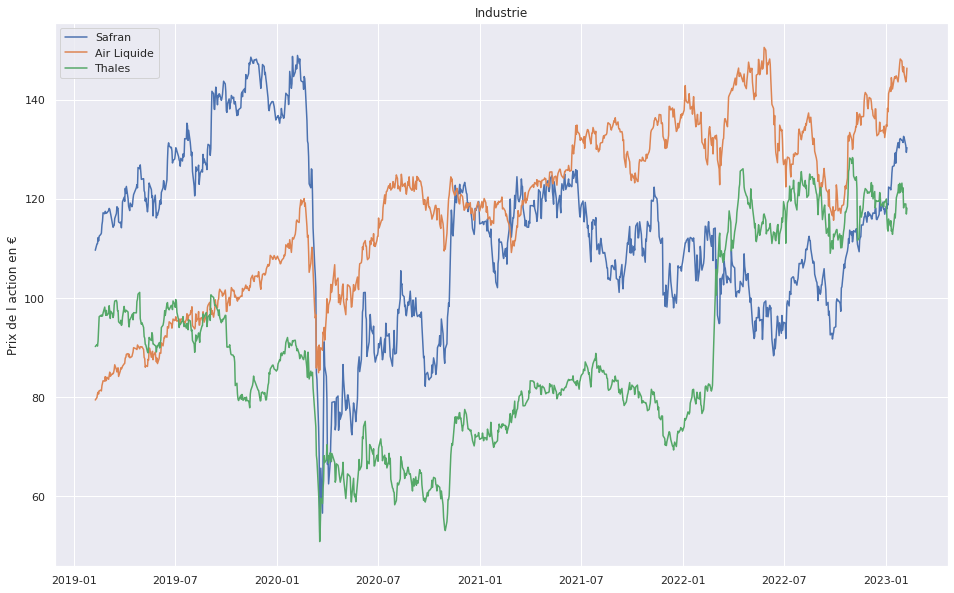

In [ ]:
import yfinance as yf
#On choisi 3 groupes dans la catégorie "Industrie"
SafranInfo = yf.Ticker("SAF.PA")
AirLiquideInfo = yf.Ticker("AI.PA")
ThalesInfo = yf.Ticker("HO.PA")

data_safran = SafranInfo.history(period="4y")
data_air = AirLiquideInfo.history(period="4y")
data_thales = ThalesInfo.history(period="4y")

plt.figure(figsize=(16,10))
plt.plot (data_safran.index,data_safran["Close"], label="Safran")
plt.plot(data_air.index, data_air["Close"], label = "Air Liquide")
plt.plot(data_thales.index, data_thales["Close"], label = "Thales")
plt.title ('Industrie')
plt.ylabel ('Prix de l action en €')
plt.legend()
plt.show()

In [ ]:
data_safran.tail()

Open        High         Low       Close  \
Date                                                                        
2023-02-02 00:00:00+01:00  131.759995  132.880005  131.080002  132.639999   
2023-02-03 00:00:00+01:00  132.119995  132.500000  130.259995  132.399994   
2023-02-06 00:00:00+01:00  132.020004  132.100006  129.779999  130.759995   
2023-02-07 00:00:00+01:00  131.240005  131.240005  129.020004  129.399994   
2023-02-08 00:00:00+01:00  130.240005  130.740005  130.179993  130.699997   

                            Volume  Dividends  Stock Splits  
Date                                                         
2023-02-02 00:00:00+01:00   790112        0.0           0.0  
2023-02-03 00:00:00+01:00  1115180        0.0           0.0  
2023-02-06 00:00:00+01:00   725453        0.0           0.0  
2023-02-07 00:00:00+01:00   685186        0.0           0.0  
2023-02-08 00:00:00+01:00    16870        0.0           0.0

### Stats du DataFrame contenant les informations de l'action de Safran depuis 1 an.

In [ ]:
data_safran.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1029 entries, 2019-02-08 00:00:00+01:00 to 2023-02-08 00:00:00+01:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1029 non-null   float64
 1   High          1029 non-null   float64
 2   Low           1029 non-null   float64
 3   Close         1029 non-null   float64
 4   Volume        1029 non-null   int64  
 5   Dividends     1029 non-null   float64
 6   Stock Splits  1029 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 96.6 KB


### Afin de différencier les tendances par action, on va afficher l'historique des cours d'ouverture par action


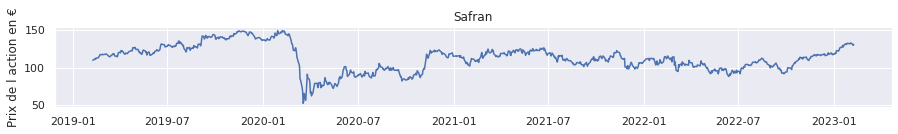

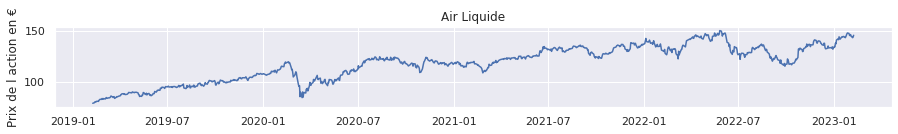

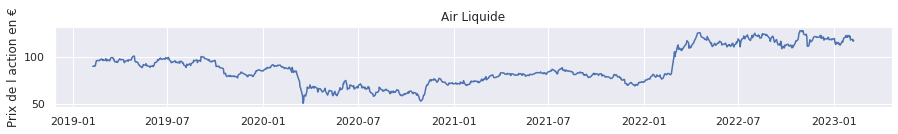

In [ ]:
plt.figure(figsize=(15, 5))
#Graphe Safran
plt.subplot(3,1,1)
plt.plot(data_safran.index,data_safran["Close"], label="Safran")
plt.title('Safran')
plt.ylabel('Prix de l action en €')
plt.show()

#Graphe Air Liquide
plt.figure(figsize=(15, 5))
plt.subplot(3,1,2)
plt.plot(data_air.index, data_air["Close"], label = "Air Liquide")
plt.title('Air Liquide')
plt.ylabel('Prix de l action en €')
plt.show()

#Graphe Thales
plt.figure(figsize=(15, 5))
plt.subplot(3,1,2)
plt.plot(data_thales.index, data_thales["Close"], label = "Thales")
plt.title('Air Liquide')
plt.ylabel('Prix de l action en €')
plt.show()

### Le cours de l'action nous donne une idée de l'évolution de l'action unitaire au niveau du marché, le prix d'action dépend aussi du volume tradé courant la période.

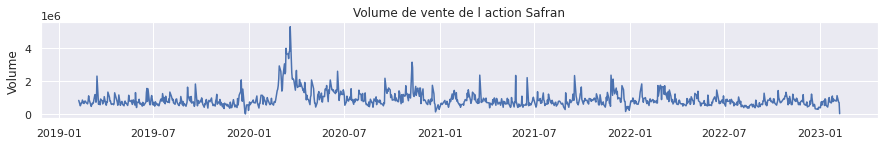

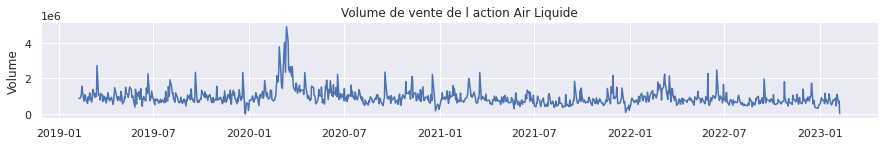

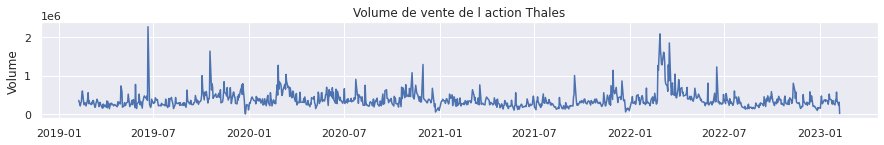

In [ ]:
plt.figure(figsize=(15, 6))
plt.subplot(3,1,1)

#Safran 
plt.plot(data_safran.index,data_safran["Volume"], label="Safran")
plt.title('Volume de vente de l action Safran')
plt.ylabel('Volume')
plt.show();

#Air Liquide
plt.figure(figsize=(15, 6))
plt.subplot(3,1,2)
plt.plot(data_air.index, data_air["Volume"], label = "Air Liquide")
plt.title('Volume de vente de l action Air Liquide')
plt.ylabel('Volume')
plt.show();

#Thales
plt.figure(figsize=(15, 6))
plt.subplot(3,1,2)
plt.plot(data_thales.index, data_thales["Volume"], label = "Thales")
plt.title('Volume de vente de l action Thales')
plt.ylabel('Volume')
plt.show();

### On remarque que les volumes échangés sont très proches entre les 3 groupes.
Maintenant que nous avons vu les visualisations du cours de clôture et du volume échangé chaque jour,calculons la moyenne mobile de l'action.

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
      column_name = f"MA for {ma} days"
      data_safran[column_name] =  data_safran['Close'].rolling(ma).mean()
      data_air[column_name] = data_air['Close'].rolling(ma).mean()
      data_thales[column_name] = data_thales['Close'].rolling(ma).mean()

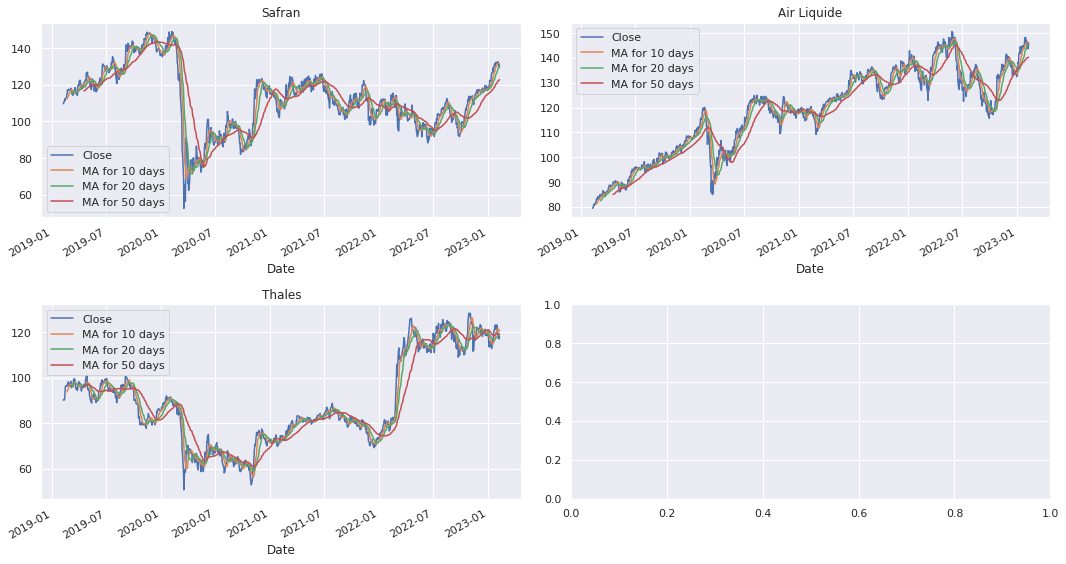

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

data_safran[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Safran')

data_air[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Air Liquide')

data_thales[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('Thales')


fig.tight_layout()

### Calculons à présent le Daily Return par action:

In [ ]:
data_safran['Daily Return'] = data_safran['Close'].pct_change()
data_air['Daily Return'] = data_air['Close'].pct_change()
data_thales['Daily Return'] = data_thales['Close'].pct_change()

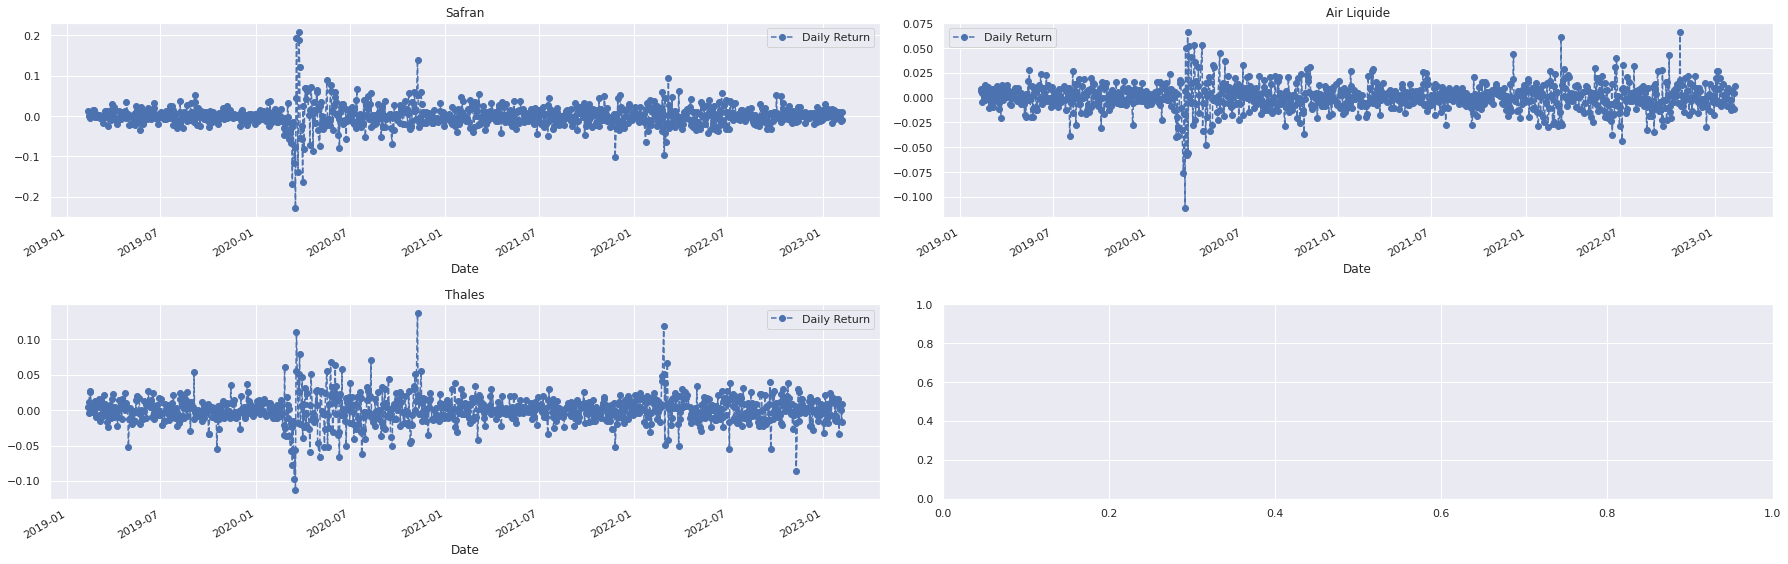

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(25)

data_safran['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('Safran')

data_air['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('Air Liquide')

data_thales['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('Thales')

fig.tight_layout()

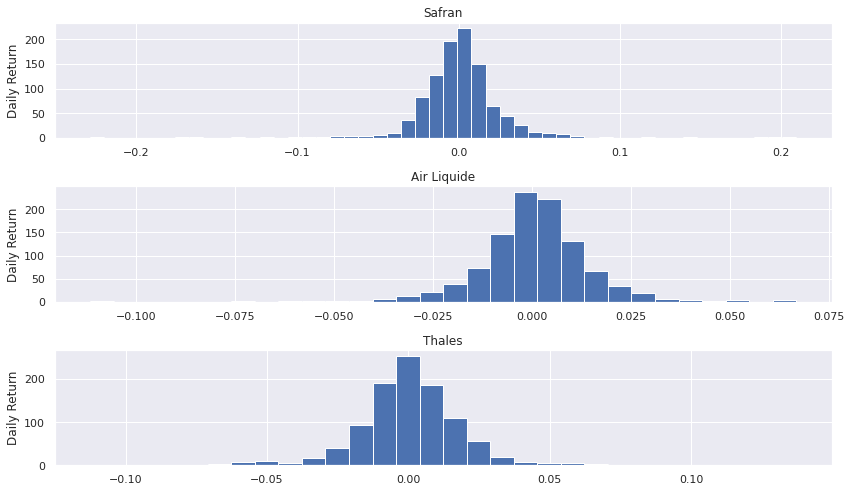

In [ ]:
plt.figure(figsize=(12, 7))

#Safran
plt.subplot(3, 1, 1)
data_safran['Daily Return'].hist(bins=50)
plt.ylabel('Daily Return')
plt.title('Safran')

#Air 
plt.subplot(3, 1, 2)
data_air['Daily Return'].hist(bins=30)
plt.ylabel('Daily Return')
plt.title('Air Liquide')

#Thales
plt.subplot(3, 1, 3)
data_thales['Daily Return'].hist(bins=30
                                )
plt.ylabel('Daily Return')
plt.title('Thales')  
    
plt.tight_layout()

In [ ]:

ticker = ['SAF.PA',
'AI.PA',
'HO.PA']
sns.set_theme()
import pandas_datareader.data as web
from datetime import datetime
end = datetime.now()
start = datetime(end.year - 4, end.month, end.day)
from pandas_datareader.data import DataReader
import pandas_datareader.data as web

import pandas as pd

import datetime as dt

df = web.DataReader('SAF.PA', 'yahoo', start='2021-11-28', end='2022-11-28')
df.head()

RemoteDataError: ignored

In [ ]:
from pandas_datareader.data import DataReader
closing_df = DataReader(ticker, 'yahoo', start, end)['Close']
closing_df.head() 

In [ ]:
Fin_returns = closing_df.pct_change()
Fin_returns.head()

In [ ]:
sns.pairplot(Fin_returns, kind='reg')

In [ ]:
sns.heatmap(Fin_returns.corr(), annot=True, cmap='summer')


On remarque qu'il n'y a pas vraiment de corrélation entre ces 3 groupes. Même si ils font parties du même secteur d'activité "industriel", ils ne sont pas concurrents et ne sont pas sur les mêmes marchés.

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(Fin_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

Nous pouvons Quantifier le risk de notre investissement en comparant l'expected return à l'écart type des returns journaliers récupérés

In [ ]:
import numpy as np

rets = Fin_returns.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))


### **Prédiction du cours de clôture des actions:**

Prenons nos 3 actions du secteur de l'industrie.


SAFRAN :

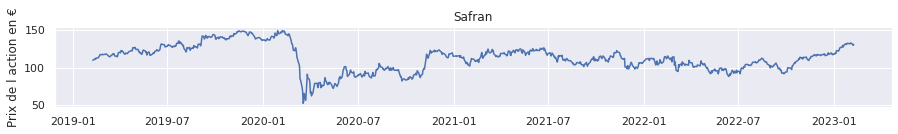

In [ ]:
plt.figure(figsize=(15, 5))
#Graphe Safran
plt.subplot(3,1,1)
plt.plot(data_safran.index,data_safran["Close"], label="Safran")
plt.title('Safran')
plt.ylabel('Prix de l action en €')
plt.show()


In [ ]:

import numpy as np
# Create a new dataframe with only the 'Close column 
df = data_safran.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = df.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .20 ))

training_data_len

206

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.59143326],
       [0.60462035],
       [0.60512745],
       ...,
       [0.81077689],
       [0.79665278],
       [0.80662281]])

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.59143326, 0.60462035, 0.60512745, 0.6178072 , 0.61121366,
       0.62085035, 0.62490793, 0.62744397, 0.6446884 , 0.65229631,
       0.67004807, 0.66801936, 0.67309122, 0.67004807, 0.66903372,
       0.67004807, 0.67461275, 0.67917759, 0.6771488 , 0.67156977,
       0.6654834 , 0.64519566, 0.63961655, 0.64215244, 0.64367405,
       0.6578755 , 0.66852654, 0.68272791, 0.67917759, 0.67968469,
       0.65077469, 0.64823881, 0.65077469, 0.63860219, 0.65635396,
       0.69287178, 0.70250847, 0.69388613, 0.72127467, 0.71062347,
       0.72533209, 0.70047968, 0.68374227, 0.67917759, 0.67461275,
       0.69033589, 0.68272791, 0.68678541, 0.69946532, 0.70808758,
       0.72279605, 0.72888249, 0.72228895, 0.76489321, 0.76235732,
       0.77047224, 0.74004064, 0.74054782, 0.74156225, 0.71620274])]
[0.713159514553187]

[array([0.59143326, 0.60462035, 0.60512745, 0.6178072 , 0.61121366,
       0.62085035, 0.62490793, 0.62744397, 0.6446884 , 0.65229631,
       0.67004807, 0.66801936, 0.6730

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

146/146 [==============================] - 10s 46ms/step - loss: 0.0137


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

26/26 [==============================] - 2s 42ms/step


13.736729424258748

<ipython-input-55-f0d93fcf5e3e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


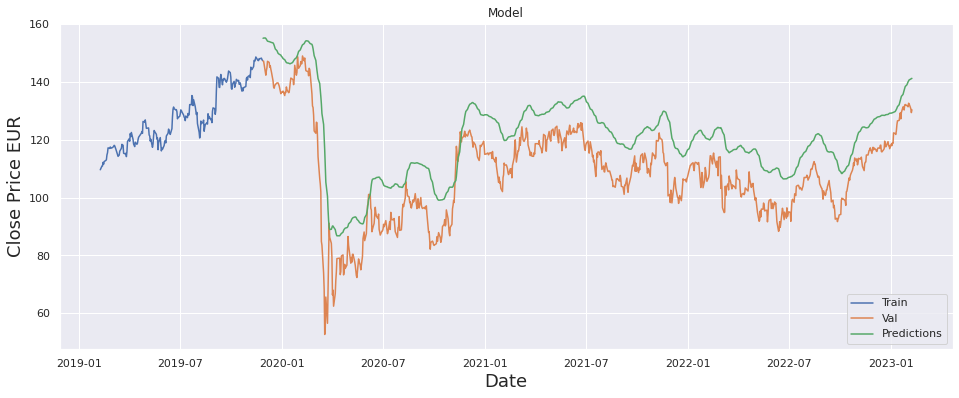

In [ ]:
# Plot the data
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price EUR', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid


XGBOOST

Décomposition

In [ ]:
import os
import xgboost as xgb

from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Time series decomposition
!pip install stldecompose
!pip install statsmodels==0.10.2
from statsmodels.tsa.seasonal import seasonal_decompose



safran = data_safran["Close"]
safran.squeeze()
safran.head()
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(safran)
res.plot()
plt.show()

Moving Averages
features:  SMA5 ,  SMA10 ,  SMA15 ,  SMA30  and  EMA9 .

In [ ]:
safran = data_safran["Close"]
safran.squeeze()
data_safran['EMA_9'] = safran.ewm(9).mean().shift()
data_safran['SMA_5'] = safran.rolling(5).mean().shift()
data_safran['SMA_10'] = safran.rolling(10).mean().shift()
data_safran['SMA_15'] = safran.rolling(15).mean().shift()
data_safran['SMA_30'] = safran.rolling(30).mean().shift()
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_safran.index, y=data_safran.EMA_9, name='EMA 9'))
fig.add_trace(go.Scatter(x=data_safran.index, y=data_safran.SMA_5, name='SMA 5'))
fig.add_trace(go.Scatter(x=data_safran.index, y=data_safran.SMA_10, name='SMA 10'))
fig.add_trace(go.Scatter(x=data_safran.index, y=data_safran.SMA_15, name='SMA 15'))
fig.add_trace(go.Scatter(x=data_safran.index, y=data_safran.SMA_30, name='SMA 30'))
fig.add_trace(go.Scatter(x=data_safran.index, y=data_safran.Close, name='Close', opacity=0.2))
fig.show()

Relative Strength Index
Overbought/Oversold

In [ ]:
def relative_strength_idx(df, n=14):
    close = df['Close']
    delta = close.diff()
    delta = delta[1:]
    pricesUp = delta.copy()
    pricesDown = delta.copy()
    pricesUp[pricesUp < 0] = 0
    pricesDown[pricesDown > 0] = 0
    rollUp = pricesUp.rolling(n).mean()
    rollDown = pricesDown.abs().rolling(n).mean()
    rs = rollUp / rollDown
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi

data_safran['RSI'] = relative_strength_idx(data_safran).fillna(0)

fig = go.Figure(go.Scatter(x=data_safran.index, y=data_safran.RSI, name='RSI'))
fig.show()

MACD


In [ ]:
 
from plotly.subplots import make_subplots
EMA_12 = pd.Series(data_safran['Close'].ewm(span=12, min_periods=12).mean())
EMA_26 = pd.Series(data_safran['Close'].ewm(span=26, min_periods=26).mean())
data_safran['MACD'] = pd.Series(EMA_12 - EMA_26)
data_safran['MACD_signal'] = pd.Series(data_safran.MACD.ewm(span=9, min_periods=9).mean())

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=data_safran.index, y=data_safran.Close, name='Close'), row=1, col=1)
fig.add_trace(go.Scatter(x=data_safran.index, y=EMA_12, name='EMA 12'), row=1, col=1)
fig.add_trace(go.Scatter(x=data_safran.index, y=EMA_26, name='EMA 26'), row=1, col=1)
fig.add_trace(go.Scatter(x=data_safran.index, y=data_safran['MACD'], name='MACD'), row=2, col=1)
fig.add_trace(go.Scatter(x=data_safran.index, y=data_safran['MACD_signal'], name='Signal line'), row=2, col=1)
fig.show()

In [ ]:
data_safran['Close'] = data_safran['Close'].shift(-1)

In [ ]:
data_safran = data_safran.iloc[33:] # Because of moving averages and MACD line
data_safran = data_safran[:-1]      # Because of shifting close price

data_safran.index = range(len(data_safran))

training = 70% , validation = 15% et test = 15% 

In [ ]:
test_size  = 0.15
valid_size = 0.15

test_split_idx  = int(data_safran.shape[0] * (1-test_size))
valid_split_idx = int(data_safran.shape[0] * (1-(valid_size+test_size)))

train_df  = data_safran.loc[:valid_split_idx].copy()
valid_df  = data_safran.loc[valid_split_idx+1:test_split_idx].copy()
test_df   = data_safran.loc[test_split_idx+1:].copy()

fig = go.Figure()
fig.add_trace(go.Scatter(x=train_df.index, y=train_df.Close, name='Training'))
fig.add_trace(go.Scatter(x=valid_df.index, y=valid_df.Close, name='Validation'))
fig.add_trace(go.Scatter(x=test_df.index,  y=test_df.Close,  name='Test'))
fig.show()

In [ ]:

drop_cols = ['Volume', 'Open', 'Low', 'High',"Dividends","Stock Splits","MA for 10 days","MA for 20 days","MA for 50 days","Daily Return"]

train_df = train_df.drop(drop_cols, 1)
valid_df = valid_df.drop(drop_cols, 1)
test_df  = test_df.drop(drop_cols, 1)

In [ ]:
drop_cols = ["Dividends","Stock Splits","MA for 10 days","MA for 20 days","MA for 50 days","Daily Return"]

train_df = train_df.drop(drop_cols, 1)
valid_df = valid_df.drop(drop_cols, 1)
test_df  = test_df.drop(drop_cols, 1)
train_df.head()

In [ ]:
y_train = train_df['Close'].copy()
X_train = train_df.drop(['Close'], 1)

y_valid = valid_df['Close'].copy()
X_valid = valid_df.drop(['Close'], 1)

y_test  = test_df['Close'].copy()
X_test  = test_df.drop(['Close'], 1)

X_train.info()

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
parameters = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.001, 0.005, 0.01, 0.05],
    'max_depth': [8, 10, 12, 15],
    'gamma': [0.001, 0.005, 0.01, 0.02],
    'random_state': [42]
}

eval_set = [(X_train, y_train), (X_valid, y_valid)]
model = xgb.XGBRegressor(eval_set=eval_set, objective='reg:squarederror', verbose=False)
clf = GridSearchCV(model, parameters)

clf.fit(X_train, y_train)

print(f'Best params: {clf.best_params_}')
print(f'Best validation score = {clf.best_score_}')

In [ ]:
xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.005,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=400,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
#transformer matrice xgb.Dmatrix
from xgboost import plot_importance, plot_tree
plot_importance(model);

In [ ]:
y_pred = model.predict(X_test)
print(f'y_true = {np.array(y_test)[:5]}')
print(f'y_pred = {y_pred[:5]}')

In [ ]:
print(f'mean_squared_error = {mean_squared_error(y_test, y_pred)}')

In [ ]:
predicted_prices = data_safran.loc[test_split_idx+1:].copy()
predicted_prices['Close'] = y_pred

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=data_safran.index, y=data_safran.Close,
                         name='Truth',
                         marker_color='LightSkyBlue'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                         y=predicted_prices.Close,
                         name='Prediction',
                         marker_color='MediumPurple'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                         y=y_test,
                         name='Truth',
                         marker_color='LightSkyBlue',
                         showlegend=False), row=2, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.Date,
                         y=y_pred,
                         name='Prediction',
                         marker_color='MediumPurple',
                         showlegend=False), row=2, col=1)

fig.show()

#On choisi 3 groupes dans la catégorie "Luxe"



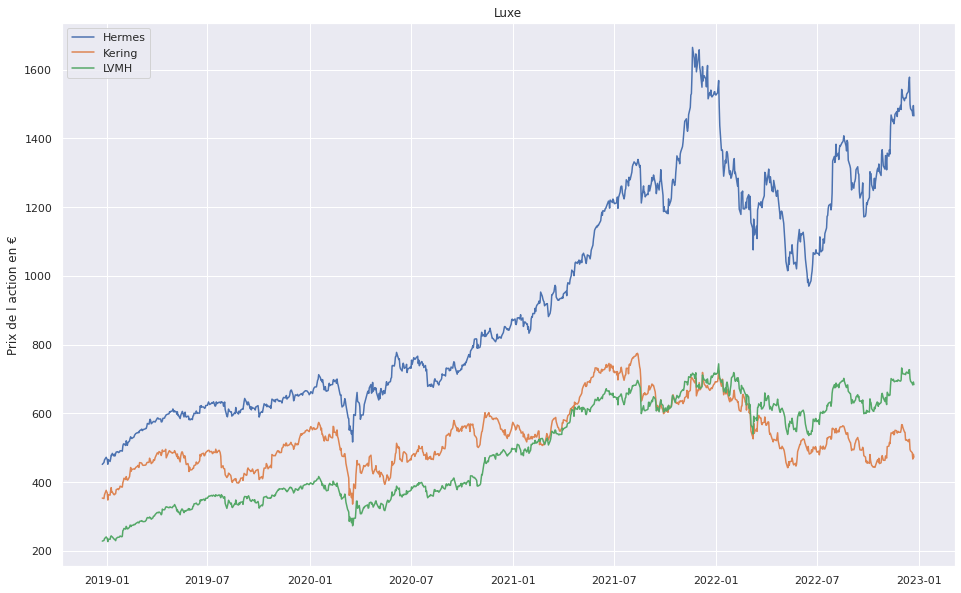

In [ ]:
HermesInfo = yf.Ticker("RMS.PA")
KeringInfo = yf.Ticker("KER.PA")
LVMHInfo = yf.Ticker("MC.PA")

data_hermes = HermesInfo.history(period="4y")
data_kering = KeringInfo.history(period="4y")
data_LVMH = LVMHInfo.history(period="4y")

plt.figure(figsize=(16,10))
plt.plot (data_hermes.index,data_hermes["Close"], label="Hermes")
plt.plot(data_kering.index, data_kering["Close"], label = "Kering")
plt.plot(data_LVMH.index, data_LVMH["Close"], label = "LVMH")
plt.title ('Luxe')
plt.ylabel ('Prix de l action en €')
plt.legend()
plt.show()

### La chute de l'action Hermes début 2022 s'explique par le fait que la concurrence affiche elle aussi de trés bon résultats. On peut considérer que ce secteur n'est pas trés optimal pour un placement par secteur. Car quand LVMH progresse les autres actions chutent.


Afin de différencier les tendances par action, on va afficher l'historique descours d'ouverture par action

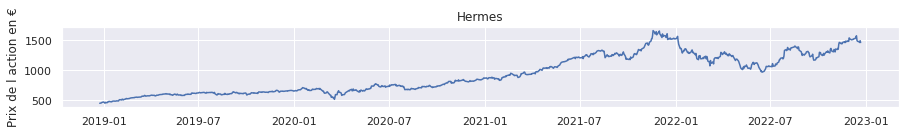

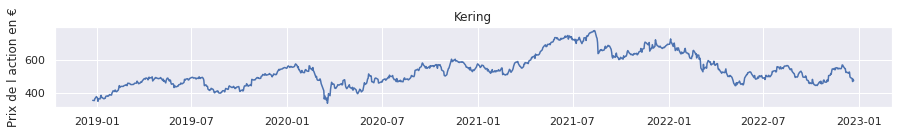

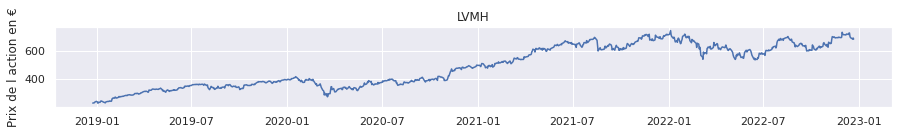

In [ ]:
plt.figure(figsize=(15, 5))
#Graphe Hermes
plt.subplot(3,1,1)
plt.plot(data_hermes.index,data_hermes["Close"], label="Hermes")
plt.title('Hermes')
plt.ylabel('Prix de l action en €')
plt.show()

#Graphe Kering
plt.figure(figsize=(15, 5))
plt.subplot(3,1,2)
plt.plot(data_kering.index, data_kering["Close"], label = "Kering")
plt.title('Kering')
plt.ylabel('Prix de l action en €')
plt.show()

#Graphe LVMH
plt.figure(figsize=(15, 5))
plt.subplot(3,1,2)
plt.plot(data_LVMH.index, data_LVMH["Close"], label = "LVMH")
plt.title('LVMH')
plt.ylabel('Prix de l action en €')
plt.show()

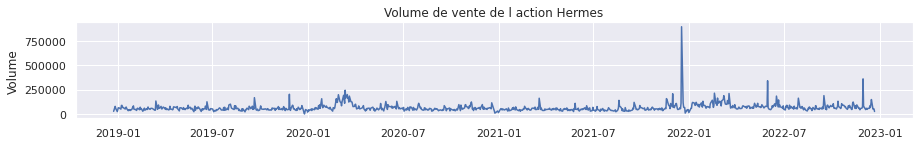

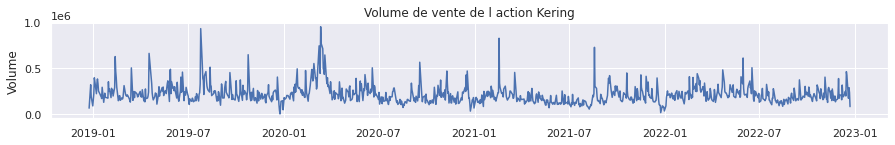

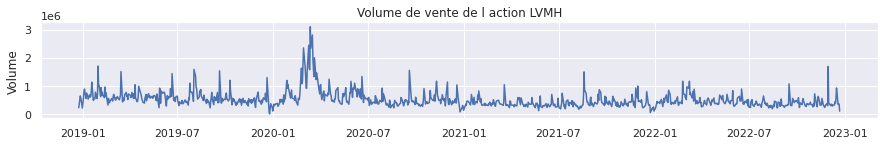

In [ ]:
plt.figure(figsize=(15, 6))
plt.subplot(3,1,1)

#Hermes
plt.plot(data_hermes.index,data_hermes["Volume"], label="Hermes")
plt.title('Volume de vente de l action Hermes')
plt.ylabel('Volume')
plt.show();

#Kering
plt.figure(figsize=(15, 6))
plt.subplot(3,1,2)
plt.plot(data_kering.index, data_kering["Volume"], label = "Kering")
plt.title('Volume de vente de l action Kering')
plt.ylabel('Volume')
plt.show();

#LVMH
plt.figure(figsize=(15, 6))
plt.subplot(3,1,2)
plt.plot(data_LVMH.index, data_LVMH["Volume"], label = "LVMH")
plt.title('Volume de vente de l action LVMH')
plt.ylabel('Volume')
plt.show();

In [ ]:
data_hermes['Daily Return'] = data_hermes['Close'].pct_change()
data_kering['Daily Return'] = data_kering['Close'].pct_change()
data_LVMH['Daily Return'] = data_LVMH['Close'].pct_change()

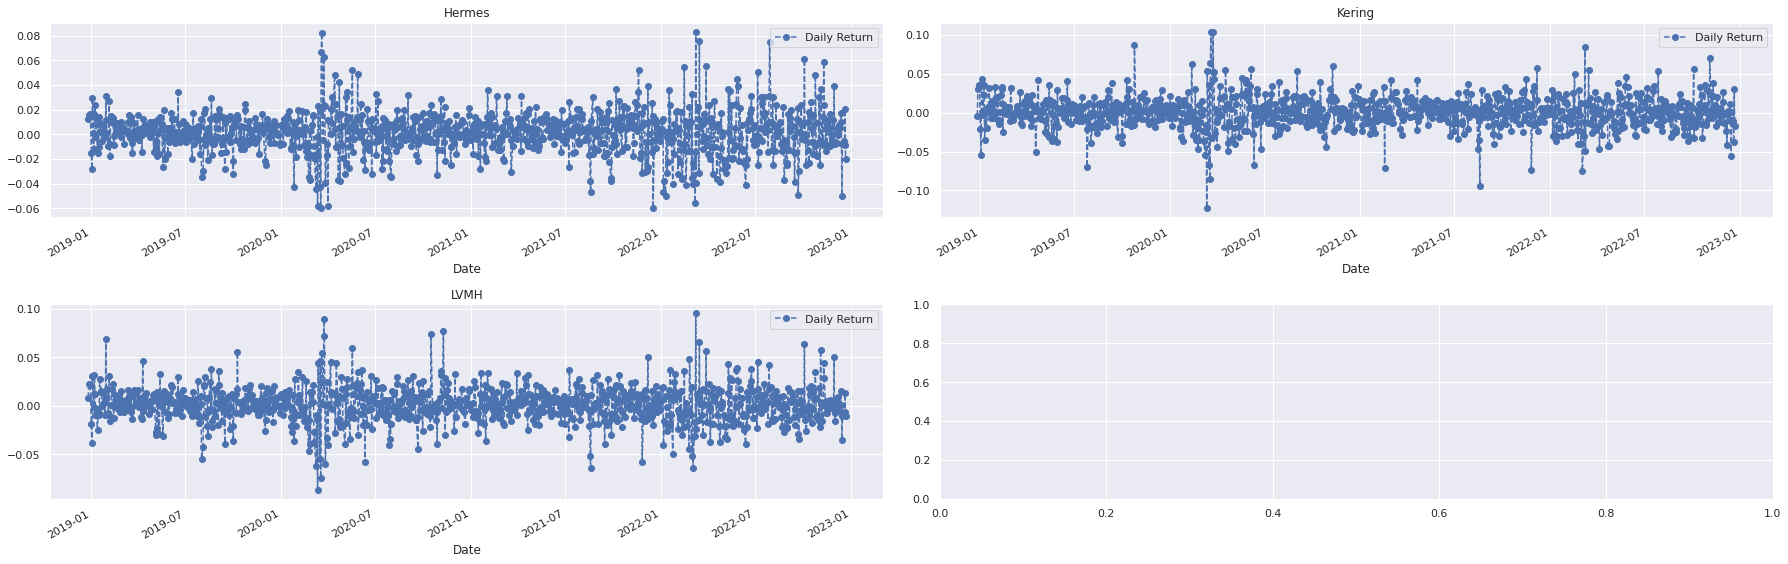

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(25)

data_hermes['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('Hermes')

data_kering['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('Kering')

data_LVMH['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('LVMH')

fig.tight_layout()

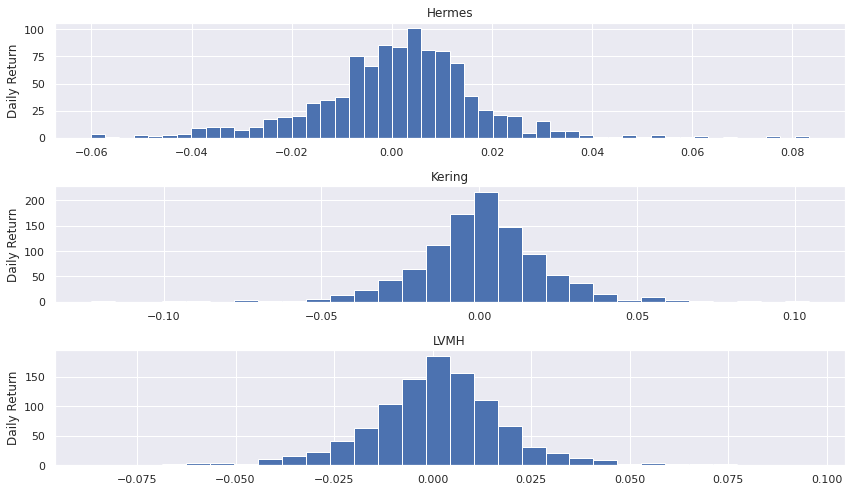

In [ ]:
plt.figure(figsize=(12, 7))

#Safran
plt.subplot(3, 1, 1)
data_hermes['Daily Return'].hist(bins=50)
plt.ylabel('Daily Return')
plt.title('Hermes')

#Air 
plt.subplot(3, 1, 2)
data_kering['Daily Return'].hist(bins=30)
plt.ylabel('Daily Return')
plt.title('Kering')

#Thales
plt.subplot(3, 1, 3)
data_LVMH['Daily Return'].hist(bins=30
                                )
plt.ylabel('Daily Return')
plt.title('LVMH')  
    
plt.tight_layout()

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
      column_name = f"MA for {ma} days"
      data_hermes[column_name] =  data_hermes['Close'].rolling(ma).mean()
      data_kering[column_name] = data_kering['Close'].rolling(ma).mean()
      data_LVMH[column_name] = data_LVMH['Close'].rolling(ma).mean()

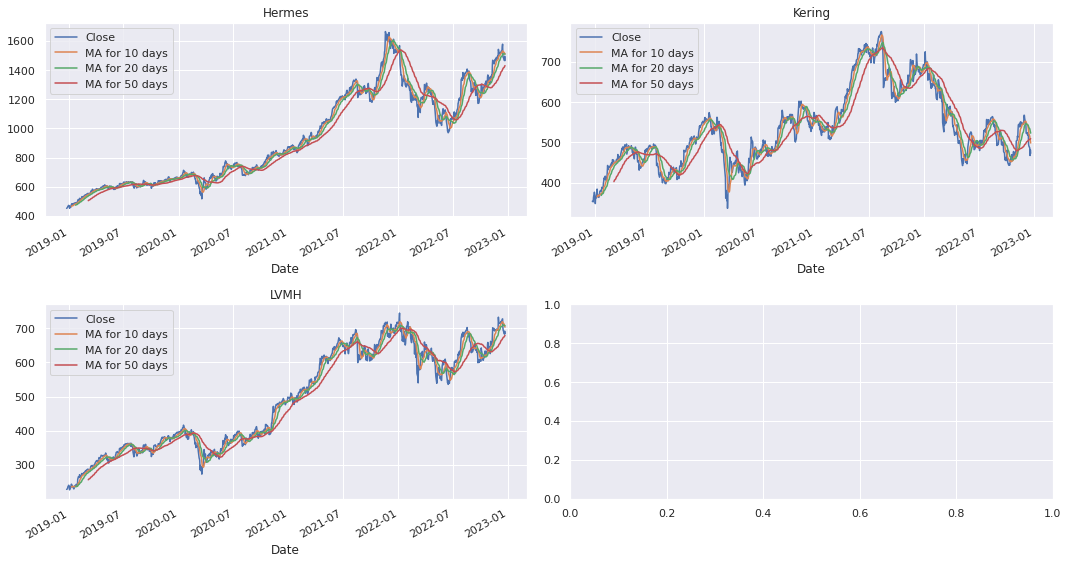

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

data_hermes[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Hermes')

data_kering[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Kering')

data_LVMH[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('LVMH')


fig.tight_layout()

In [ ]:
ticker = ['RMS.PA',
'KER.PA',
'MC.PA']
sns.set_theme()
import pandas_datareader.data as web
from datetime import datetime
end = datetime.now()
start = datetime(end.year - 4, end.month, end.day)
from pandas_datareader.data import DataReader
import pandas_datareader.data as web

import pandas as pd

import datetime as dt

df = web.DataReader('SAF.PA', 'yahoo', start=start, end=end)
df.head()


High         Low        Open       Close    Volume  \
Date                                                                   
2018-12-24  102.550003  101.050003  101.699997  101.599998  218348.0   
2018-12-27  102.750000   99.980003  102.500000  100.699997  812187.0   
2018-12-28  103.849998  101.000000  101.250000  103.099998  677330.0   
2018-12-31  105.400002  103.099998  103.400002  105.400002  240481.0   
2019-01-02  104.500000  102.349998  104.349998  103.449997  759106.0   

             Adj Close  
Date                    
2018-12-24   99.237221  
2018-12-27   98.358162  
2018-12-28  100.702339  
2018-12-31  102.948860  
2019-01-02  101.044205

In [ ]:
from pandas_datareader.data import DataReader
closing_df = DataReader(ticker, 'yahoo', start, end)['Close']
closing_df.head() 

ModuleNotFoundError: No module named 'pandas_datareader'

In [ ]:
Fin_returns = closing_df.pct_change()
Fin_returns.head()

Symbols       RMS.PA    KER.PA     MC.PA
Date                                    
2018-12-24       NaN       NaN       NaN
2018-12-27  0.012513 -0.003876  0.008158
2018-12-28  0.015981  0.031128  0.022658
2018-12-31  0.016779  0.035472  0.021563
2019-01-02 -0.014851 -0.021380 -0.018978

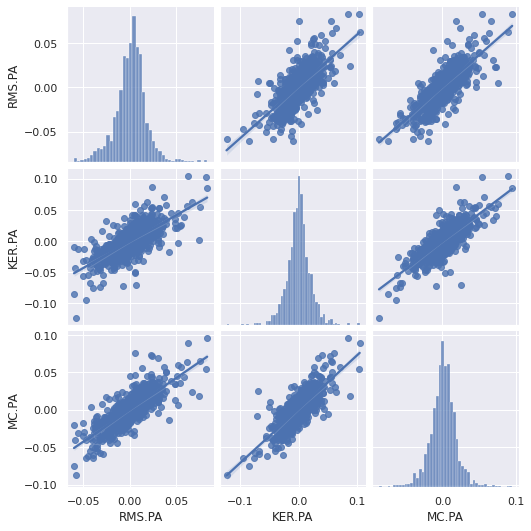

In [ ]:
sns.pairplot(Fin_returns, kind='reg')